In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/source/insurance_claims.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [ ]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

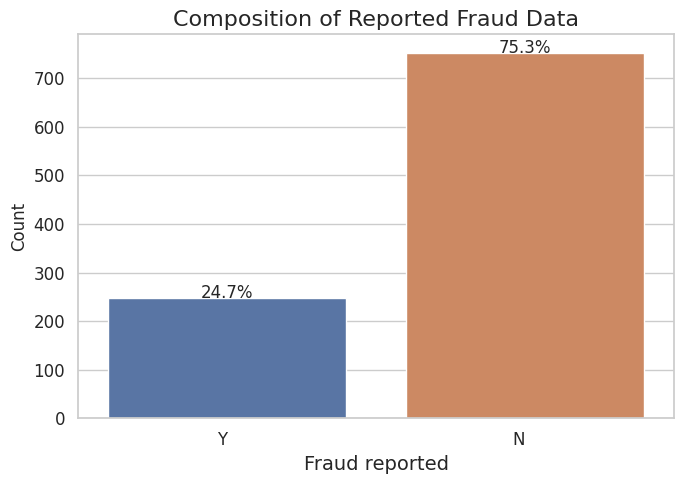

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'fraud_reported')
plt.xticks(size = 12)
plt.xlabel('Fraud reported', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Composition of Reported Fraud Data", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

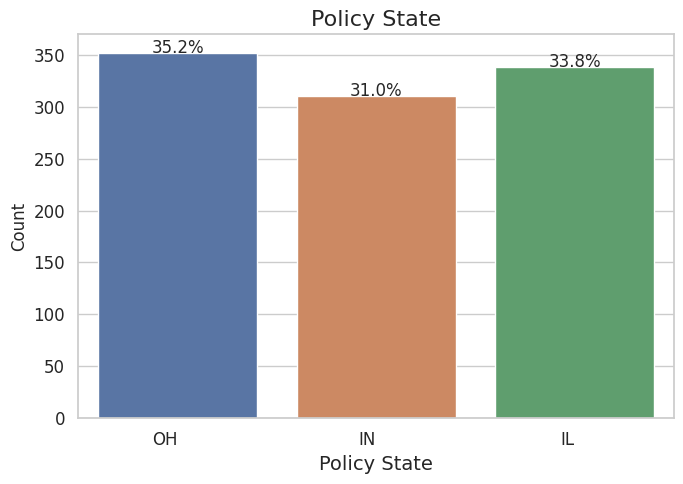

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'policy_state')
plt.xticks(size = 12)
plt.xlabel('Policy State', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Policy State", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

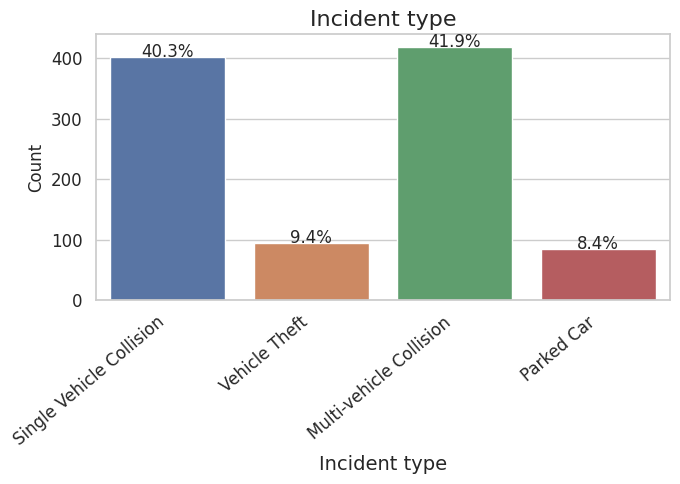

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'incident_type')
plt.xticks(size = 12)
plt.xlabel('Incident type', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Incident type", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

In [ ]:
df['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

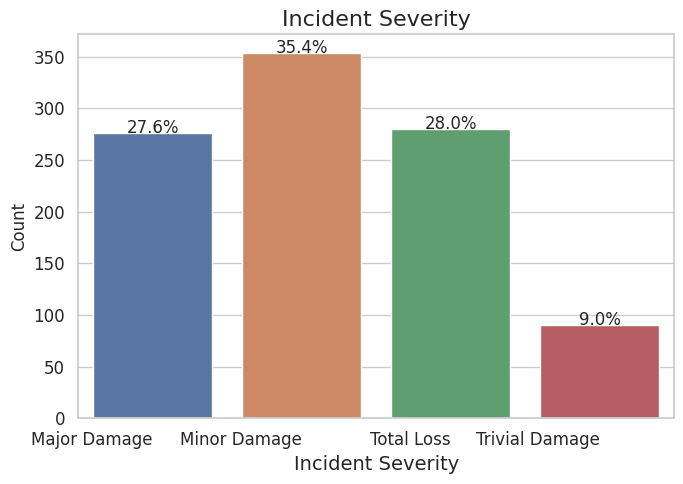

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'incident_severity')
plt.xticks(size = 12)
plt.xlabel('Incident Severity', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Incident Severity", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

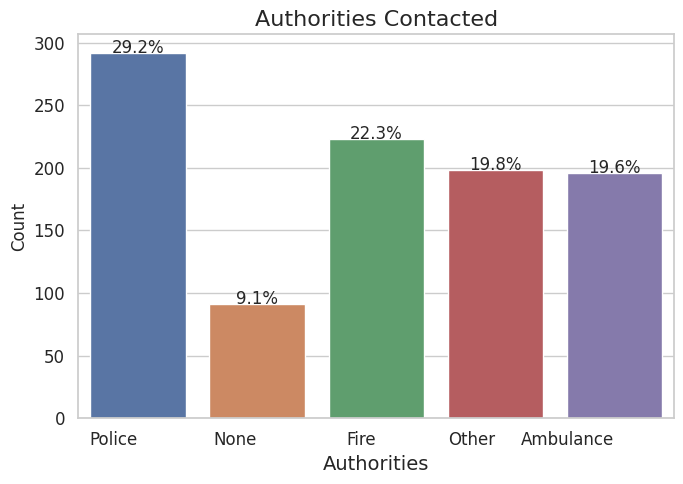

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'authorities_contacted')
plt.xticks(size = 12)
plt.xlabel('Authorities', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Authorities Contacted", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

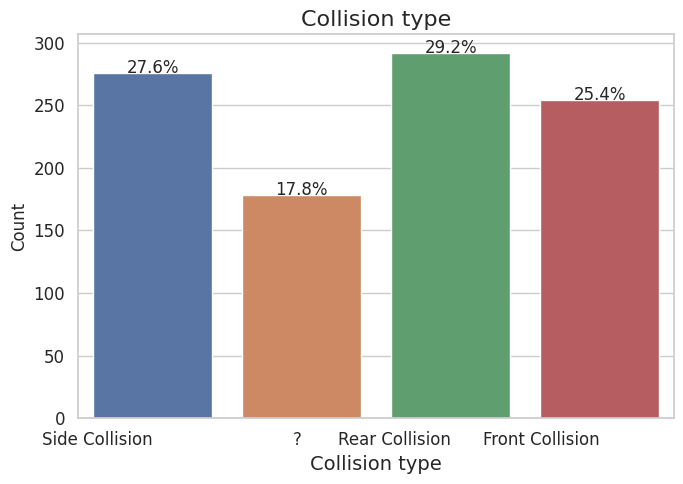

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'collision_type')
plt.xticks(size = 12)
plt.xlabel('Collision type', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Collision type", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

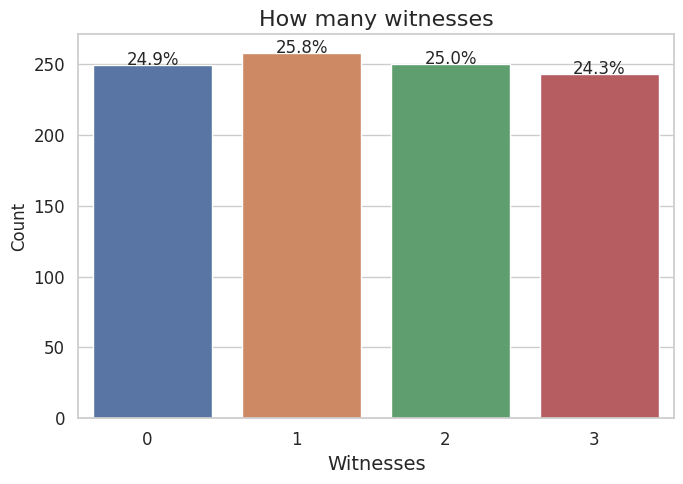

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'witnesses')
plt.xticks(size = 12)
plt.xlabel('Witnesses', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("How many witnesses", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

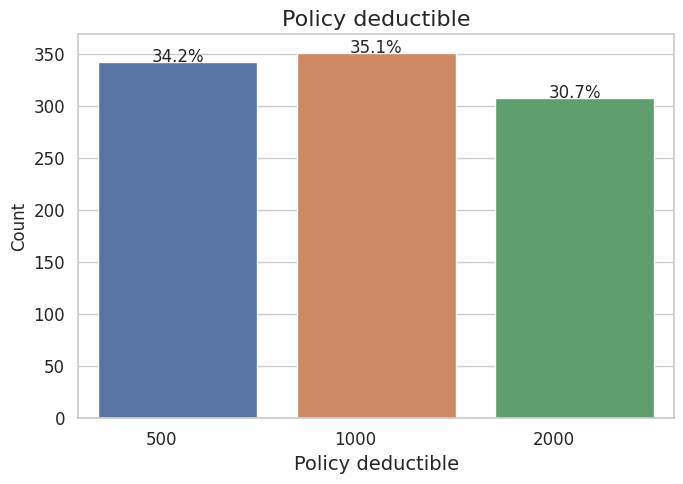

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'policy_deductable')
plt.xticks(size = 12)
plt.xlabel('Policy deductible', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Policy deductible", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

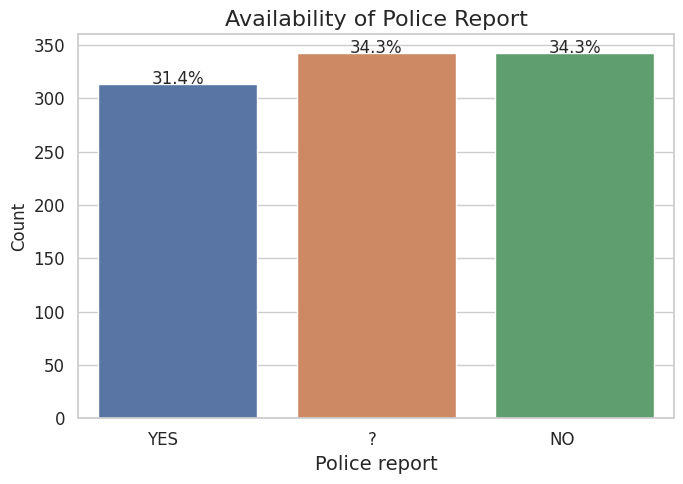

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'police_report_available')
plt.xticks(size = 12)
plt.xlabel('Police report', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Availability of Police Report", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

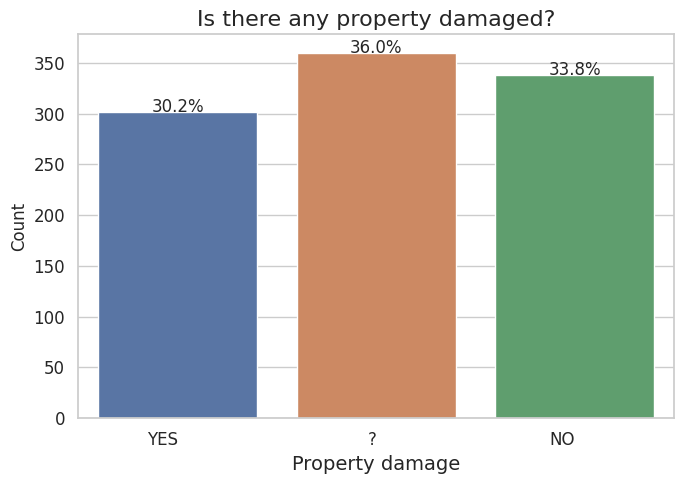

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'property_damage')
plt.xticks(size = 12)
plt.xlabel('Property damage', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Is there any property damaged?", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

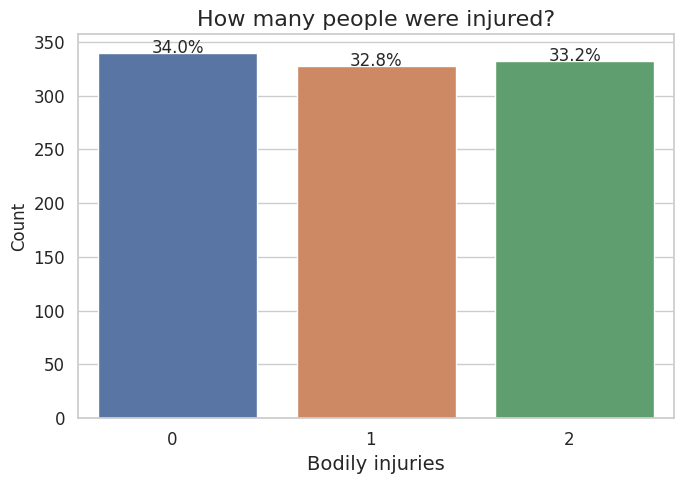

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'bodily_injuries')
plt.xticks(size = 12)
plt.xlabel('Bodily injuries', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("How many people were injured?", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

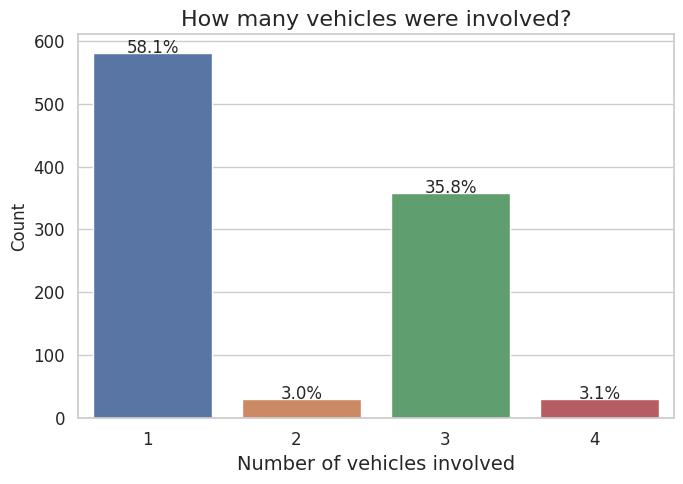

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'number_of_vehicles_involved')
plt.xticks(size = 12)
plt.xlabel('Number of vehicles involved', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("How many vehicles were involved?", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

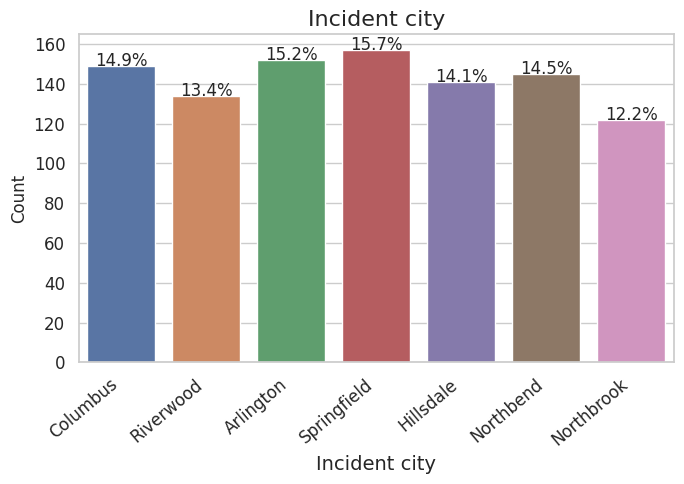

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'incident_city')
plt.xticks(size = 12)
plt.xlabel('Incident city', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Incident city", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

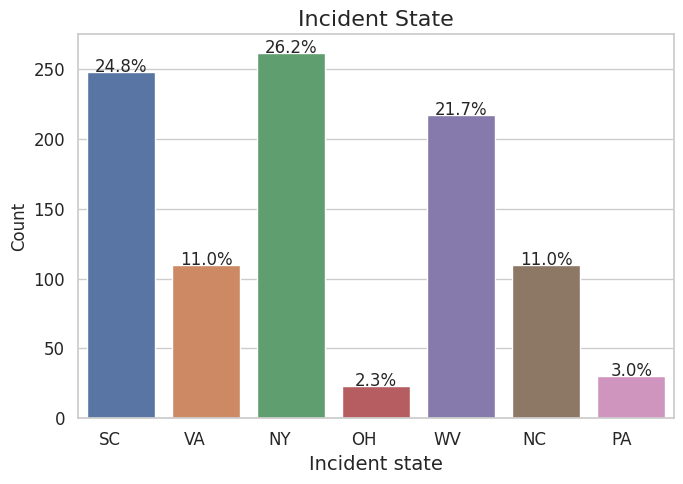

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'incident_state')
plt.xticks(size = 12)
plt.xlabel('Incident state', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Incident State", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

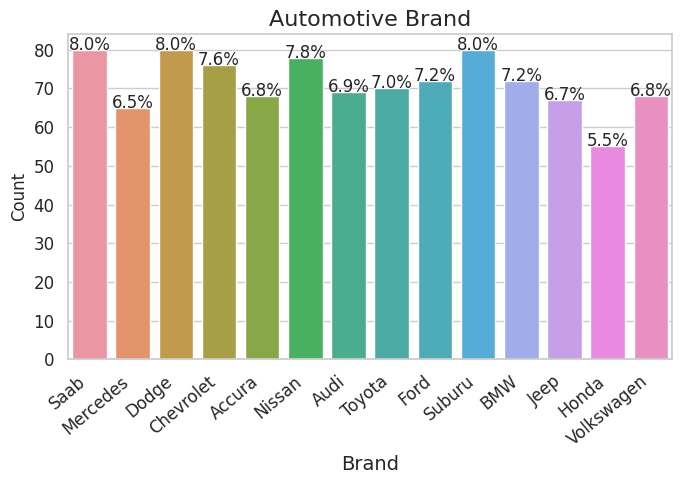

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'auto_make')
plt.xticks(size = 12)
plt.xlabel('Brand', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Automotive Brand", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

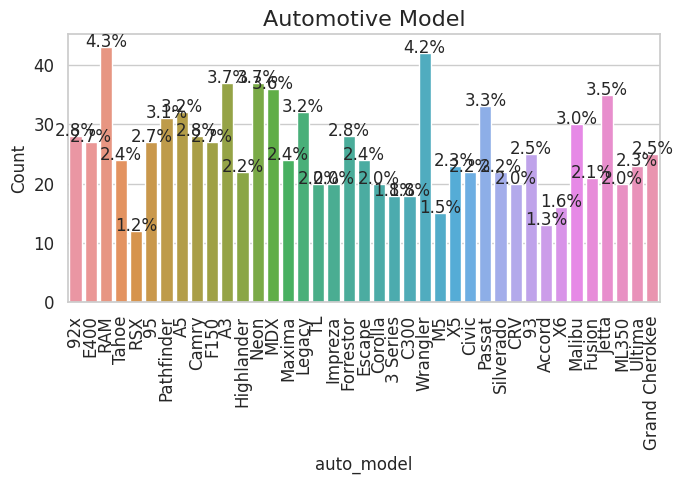

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'auto_model')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Automotive Model", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

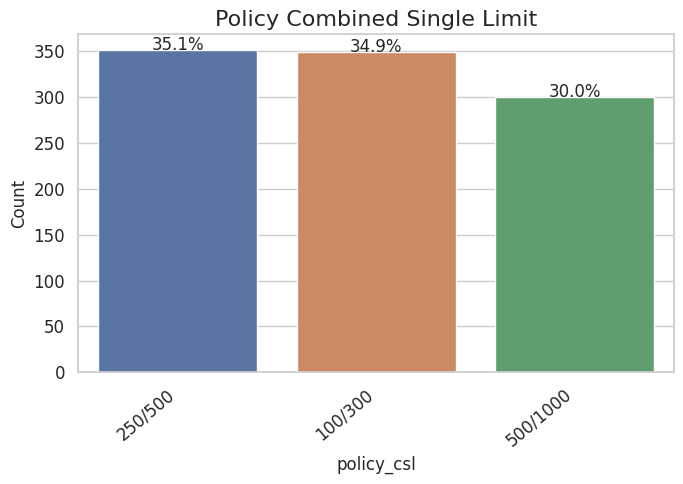

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'policy_csl')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Policy Combined Single Limit", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

<ipython-input-23-c5c605807ebc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.months_as_customer)


<Axes: xlabel='months_as_customer', ylabel='Density'>

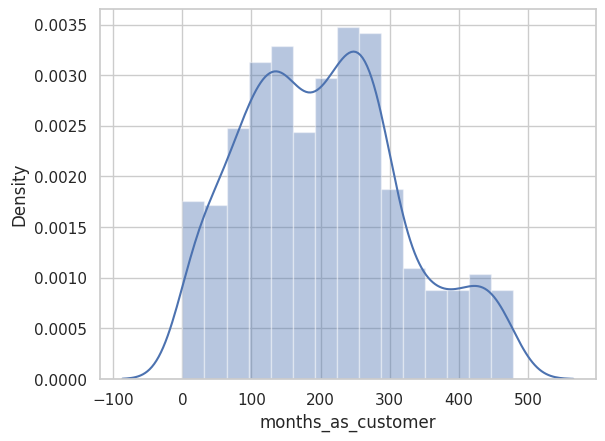

In [ ]:
sns.distplot(df.months_as_customer)

<ipython-input-24-46dfcc76eaa1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.incident_hour_of_the_day)


<Axes: xlabel='incident_hour_of_the_day', ylabel='Density'>

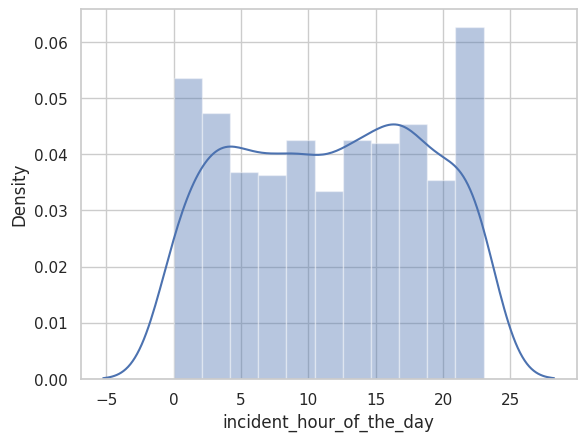

In [ ]:
sns.distplot(df.incident_hour_of_the_day)

<ipython-input-25-8f9154eed6fb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.policy_number)


<Axes: xlabel='policy_number', ylabel='Density'>

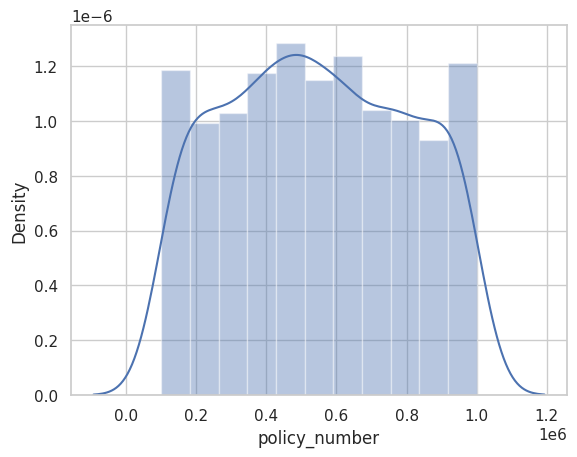

In [ ]:
sns.distplot(df.policy_number)

<ipython-input-26-7059914b3ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.policy_annual_premium)


<Axes: xlabel='policy_annual_premium', ylabel='Density'>

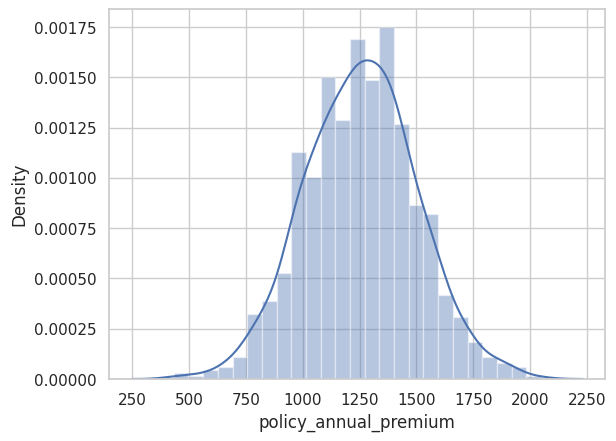

In [ ]:
sns.distplot(df.policy_annual_premium)

<ipython-input-27-a6b05369b82f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.umbrella_limit)


<Axes: xlabel='umbrella_limit', ylabel='Density'>

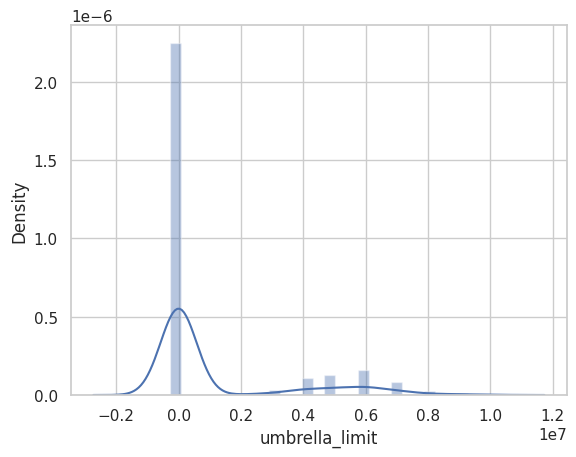

In [ ]:
sns.distplot(df.umbrella_limit)

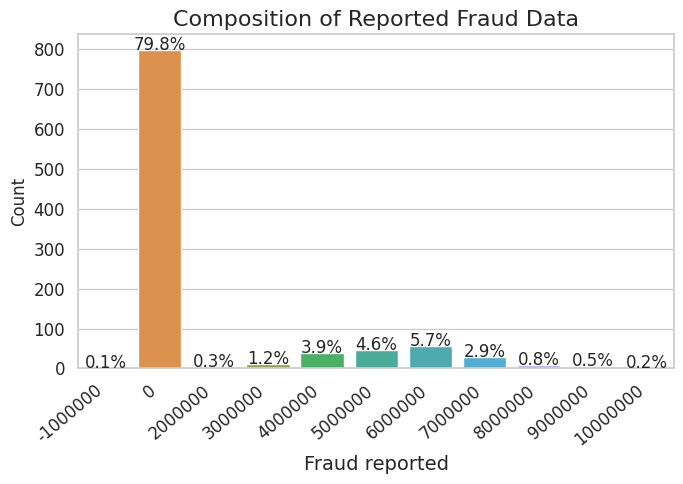

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'umbrella_limit')
plt.xticks(size = 12)
plt.xlabel('Fraud reported', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Composition of Reported Fraud Data", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

<ipython-input-29-edecde57a214>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital-gains'])


<Axes: xlabel='capital-gains', ylabel='Density'>

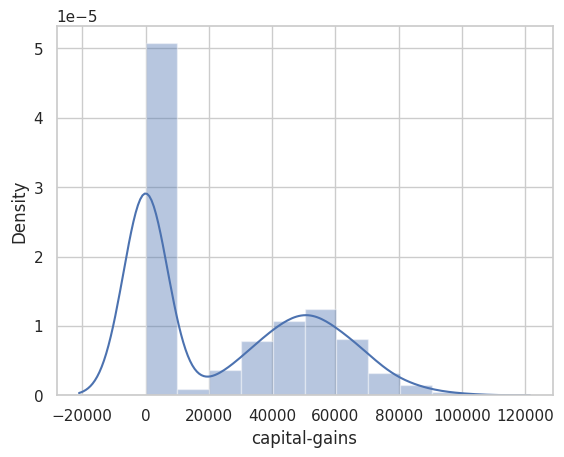

In [ ]:
sns.distplot(df['capital-gains'])

<ipython-input-30-f96fd9898a58>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital-loss'])


<Axes: xlabel='capital-loss', ylabel='Density'>

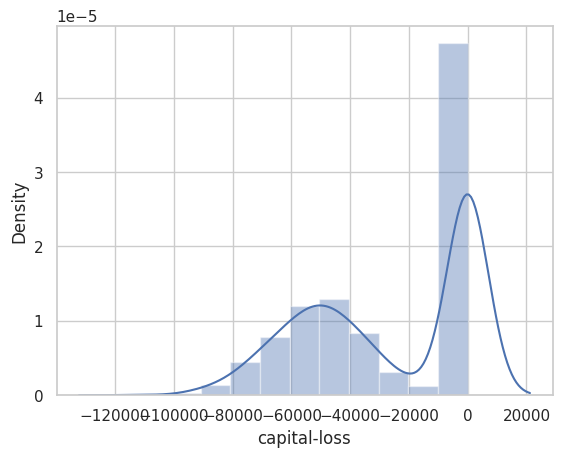

In [ ]:
sns.distplot(df['capital-loss'])

<ipython-input-31-59a7dab77705>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.injury_claim)
<ipython-input-31-59a7dab77705>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.property_claim)
<ipython-input-31-59a7dab77705>:4: UserWarning: 

`distplot` is a deprecated function and will be 

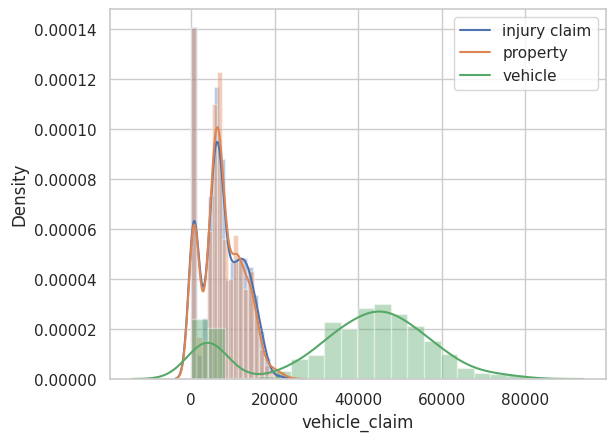

In [ ]:
#sns.distplot(df.total_claim_amount)
sns.distplot(df.injury_claim)
sns.distplot(df.property_claim)
sns.distplot(df.vehicle_claim)
plt.legend(labels = ['injury claim','property','vehicle'])
plt.show() #total_claim_amount = inj + prop + veh

<Axes: >

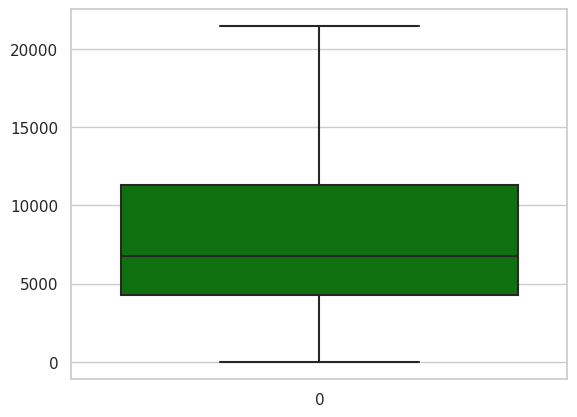

In [ ]:
sns.boxplot(df.injury_claim, color = 'green')

<Axes: >

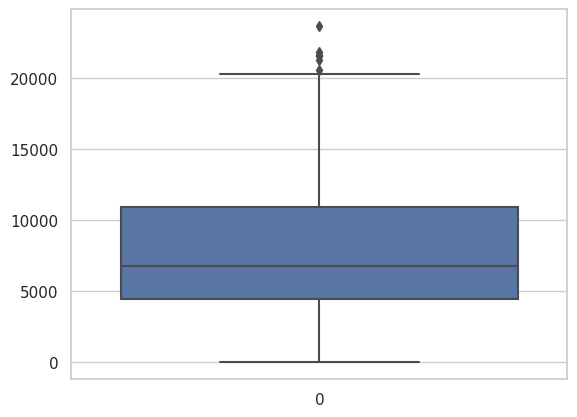

In [ ]:
sns.boxplot(df.property_claim)

<Axes: >

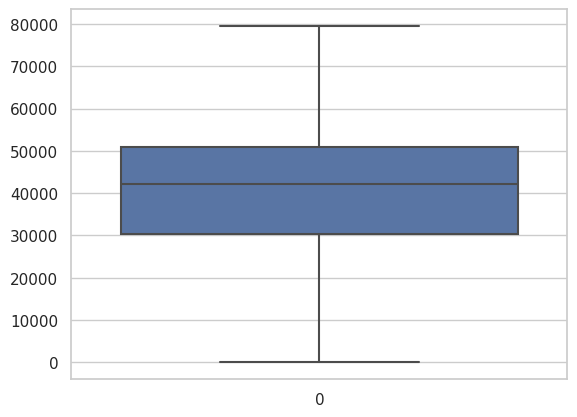

In [ ]:
sns.boxplot(df.vehicle_claim)

In [ ]:
check = df['total_claim_amount'] == df.injury_claim + df.property_claim + df.vehicle_claim
all(check)

True

<ipython-input-36-4baadb2cea74>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.insured_zip)


<Axes: xlabel='insured_zip', ylabel='Density'>

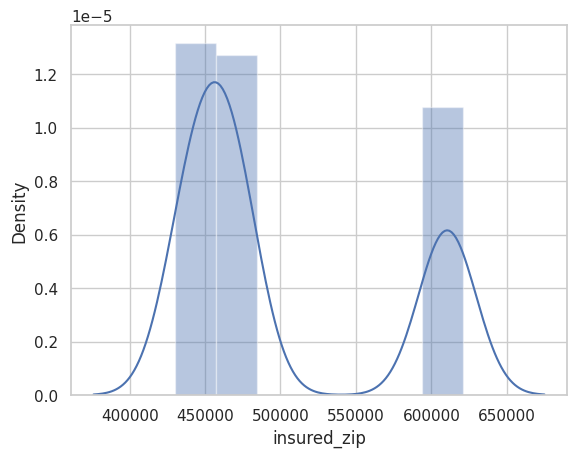

In [ ]:
sns.distplot(df.insured_zip)

<ipython-input-37-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

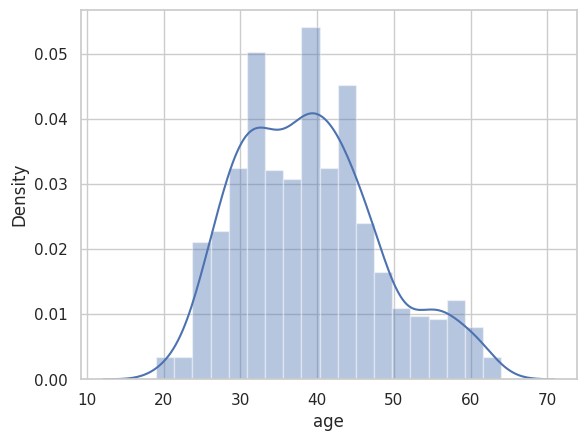

In [ ]:
sns.distplot(df.age)

<ipython-input-38-b0c3177b1d0d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.auto_year)


<Axes: xlabel='auto_year', ylabel='Density'>

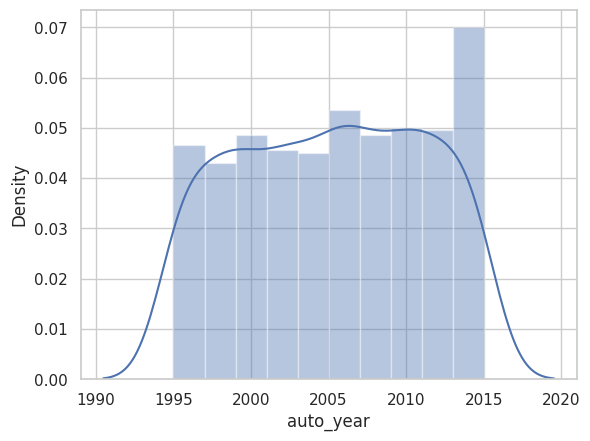

In [ ]:
sns.distplot(df.auto_year)

In [ ]:
df = df.drop(columns=['total_claim_amount', 'policy_number'])

In [ ]:
df.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,0,?,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N
5,256,39,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,...,0,2,NO,6410,6410,51280,Saab,95,2003,Y
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,...,0,0,?,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,...,2,2,YES,9380,9380,32830,Audi,A5,2015,N
8,27,33,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,...,1,1,YES,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,...,2,1,?,4700,4700,32900,Saab,92x,1996,N


In [ ]:
df=df.replace({"?": np.nan})
df.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,0,NaN,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N
5,256,39,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,...,0,2,NO,6410,6410,51280,Saab,95,2003,Y
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,...,0,0,NaN,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,...,2,2,YES,9380,9380,32830,Audi,A5,2015,N
8,27,33,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,...,1,1,YES,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,...,2,1,NaN,4700,4700,32900,Saab,92x,1996,N


<ipython-input-42-22c4e1e57f41>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_nonan.corr()


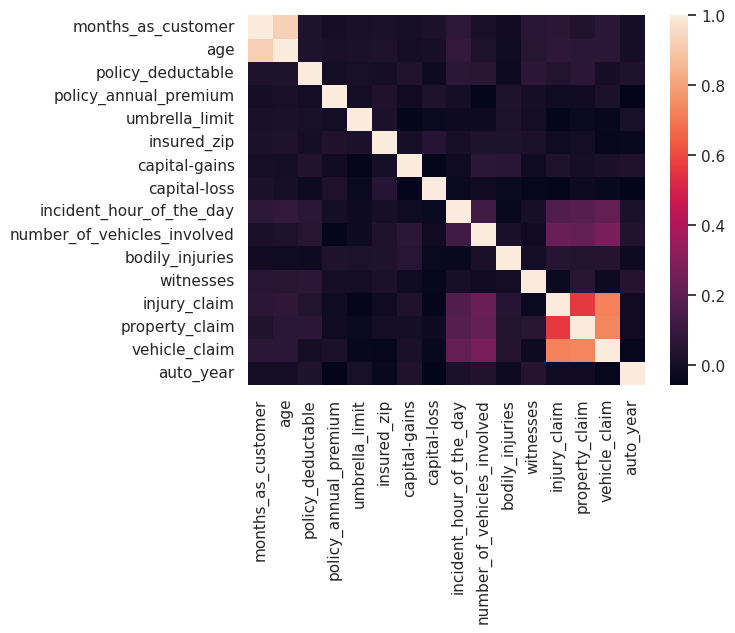

In [ ]:
#Periksa Korelasi
df_nonan = df.drop(columns = ['collision_type', 'property_damage', 'police_report_available'], axis = 1)
corrMatrix = df_nonan.corr()
sns.heatmap(corrMatrix)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

# Data Preprocessing

In [ ]:
state_dummy = pd.get_dummies(df.policy_state,prefix='policystate')
state_dummy.drop('policystate_OH', axis = 1, inplace = True)
df.drop('policy_state', axis = 1, inplace = True)
df = pd.concat([df, state_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policystate_IL,policystate_IN
0,328,48,17-10-2014,250/500,1000,1406.91,0,466132,MALE,MD,...,YES,6510,13020,52080,Saab,92x,2004,Y,0,0
1,228,42,27-06-2006,250/500,2000,1197.22,5000000,468176,MALE,MD,...,NaN,780,780,3510,Mercedes,E400,2007,Y,0,1
2,134,29,06-09-2000,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,7700,3850,23100,Dodge,RAM,2007,N,0,0
3,256,41,25-05-1990,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,0
4,228,44,06-06-2014,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,NO,1300,650,4550,Accura,RSX,2009,N,1,0


In [ ]:
csl_dummy = pd.get_dummies(df.policy_csl,prefix='csl')
csl_dummy.drop('csl_100/300', axis = 1, inplace = True)
df.drop('policy_csl', axis = 1, inplace = True)
df = pd.concat([df, csl_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policystate_IL,policystate_IN,csl_250/500,csl_500/1000
0,328,48,17-10-2014,1000,1406.91,0,466132,MALE,MD,craft-repair,...,13020,52080,Saab,92x,2004,Y,0,0,1,0
1,228,42,27-06-2006,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,780,3510,Mercedes,E400,2007,Y,0,1,1,0
2,134,29,06-09-2000,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,3850,23100,Dodge,RAM,2007,N,0,0,0,0
3,256,41,25-05-1990,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,6340,50720,Chevrolet,Tahoe,2014,Y,1,0,1,0
4,228,44,06-06-2014,1000,1583.91,6000000,610706,MALE,Associate,sales,...,650,4550,Accura,RSX,2009,N,1,0,0,1


In [ ]:
sex_dummy = pd.get_dummies(df.insured_sex,prefix='sex')
sex_dummy.drop('sex_FEMALE', axis = 1, inplace = True)
df.drop('insured_sex', axis = 1, inplace = True)
df = pd.concat([df, sex_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policystate_IL,policystate_IN,csl_250/500,csl_500/1000,sex_MALE
0,328,48,17-10-2014,1000,1406.91,0,466132,MD,craft-repair,sleeping,...,52080,Saab,92x,2004,Y,0,0,1,0,1
1,228,42,27-06-2006,2000,1197.22,5000000,468176,MD,machine-op-inspct,reading,...,3510,Mercedes,E400,2007,Y,0,1,1,0,1
2,134,29,06-09-2000,2000,1413.14,5000000,430632,PhD,sales,board-games,...,23100,Dodge,RAM,2007,N,0,0,0,0,0
3,256,41,25-05-1990,2000,1415.74,6000000,608117,PhD,armed-forces,board-games,...,50720,Chevrolet,Tahoe,2014,Y,1,0,1,0,0
4,228,44,06-06-2014,1000,1583.91,6000000,610706,Associate,sales,board-games,...,4550,Accura,RSX,2009,N,1,0,0,1,1


In [ ]:
edu_dummy = pd.get_dummies(df.insured_education_level, prefix='edu')
edu_dummy.drop('edu_MD', axis = 1, inplace = True)
df.drop('insured_education_level', axis = 1, inplace = True)
df = pd.concat([df, edu_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,insured_hobbies,insured_relationship,...,policystate_IN,csl_250/500,csl_500/1000,sex_MALE,edu_Associate,edu_College,edu_High School,edu_JD,edu_Masters,edu_PhD
0,328,48,17-10-2014,1000,1406.91,0,466132,craft-repair,sleeping,husband,...,0,1,0,1,0,0,0,0,0,0
1,228,42,27-06-2006,2000,1197.22,5000000,468176,machine-op-inspct,reading,other-relative,...,1,1,0,1,0,0,0,0,0,0
2,134,29,06-09-2000,2000,1413.14,5000000,430632,sales,board-games,own-child,...,0,0,0,0,0,0,0,0,0,1
3,256,41,25-05-1990,2000,1415.74,6000000,608117,armed-forces,board-games,unmarried,...,0,1,0,0,0,0,0,0,0,1
4,228,44,06-06-2014,1000,1583.91,6000000,610706,sales,board-games,unmarried,...,0,0,1,1,1,0,0,0,0,0


In [ ]:
occupation_dummy = pd.get_dummies(df.insured_occupation, prefix='occupation')
occupation_dummy.drop('occupation_sales', axis = 1, inplace = True)
df.drop('insured_occupation', axis = 1, inplace = True)
df = pd.concat([df, occupation_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_hobbies,insured_relationship,capital-gains,...,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_tech-support,occupation_transport-moving
0,328,48,17-10-2014,1000,1406.91,0,466132,sleeping,husband,53300,...,0,0,0,0,0,0,0,0,0,0
1,228,42,27-06-2006,2000,1197.22,5000000,468176,reading,other-relative,0,...,0,0,0,1,0,0,0,0,0,0
2,134,29,06-09-2000,2000,1413.14,5000000,430632,board-games,own-child,35100,...,0,0,0,0,0,0,0,0,0,0
3,256,41,25-05-1990,2000,1415.74,6000000,608117,board-games,unmarried,48900,...,0,0,0,0,0,0,0,0,0,0
4,228,44,06-06-2014,1000,1583.91,6000000,610706,board-games,unmarried,66000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
hobbies_dummy = pd.get_dummies(df.insured_hobbies, prefix='hobby')
hobbies_dummy.drop('hobby_board-games', axis = 1, inplace = True)
df.drop('insured_hobbies', axis = 1, inplace = True)
df = pd.concat([df, hobbies_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_relationship,capital-gains,capital-loss,...,hobby_hiking,hobby_kayaking,hobby_movies,hobby_paintball,hobby_polo,hobby_reading,hobby_skydiving,hobby_sleeping,hobby_video-games,hobby_yachting
0,328,48,17-10-2014,1000,1406.91,0,466132,husband,53300,0,...,0,0,0,0,0,0,0,1,0,0
1,228,42,27-06-2006,2000,1197.22,5000000,468176,other-relative,0,0,...,0,0,0,0,0,1,0,0,0,0
2,134,29,06-09-2000,2000,1413.14,5000000,430632,own-child,35100,0,...,0,0,0,0,0,0,0,0,0,0
3,256,41,25-05-1990,2000,1415.74,6000000,608117,unmarried,48900,-62400,...,0,0,0,0,0,0,0,0,0,0
4,228,44,06-06-2014,1000,1583.91,6000000,610706,unmarried,66000,-46000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
relation_dummy = pd.get_dummies(df.insured_relationship, prefix='relation')
relation_dummy.drop('relation_unmarried', axis = 1, inplace = True)
df.drop('insured_relationship', axis = 1, inplace = True)
df = pd.concat([df, relation_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,...,hobby_reading,hobby_skydiving,hobby_sleeping,hobby_video-games,hobby_yachting,relation_husband,relation_not-in-family,relation_other-relative,relation_own-child,relation_wife
0,328,48,17-10-2014,1000,1406.91,0,466132,53300,0,25-01-2015,...,0,0,1,0,0,1,0,0,0,0
1,228,42,27-06-2006,2000,1197.22,5000000,468176,0,0,21-01-2015,...,1,0,0,0,0,0,0,1,0,0
2,134,29,06-09-2000,2000,1413.14,5000000,430632,35100,0,22-02-2015,...,0,0,0,0,0,0,0,0,1,0
3,256,41,25-05-1990,2000,1415.74,6000000,608117,48900,-62400,10-01-2015,...,0,0,0,0,0,0,0,0,0,0
4,228,44,06-06-2014,1000,1583.91,6000000,610706,66000,-46000,17-02-2015,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
severity_dummy = pd.get_dummies(df.incident_severity, prefix='severity')
severity_dummy.drop('severity_Trivial Damage', axis = 1, inplace = True)
df.drop('incident_severity', axis = 1, inplace = True)
df = pd.concat([df, severity_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,...,hobby_video-games,hobby_yachting,relation_husband,relation_not-in-family,relation_other-relative,relation_own-child,relation_wife,severity_Major Damage,severity_Minor Damage,severity_Total Loss
0,328,48,17-10-2014,1000,1406.91,0,466132,53300,0,25-01-2015,...,0,0,1,0,0,0,0,1,0,0
1,228,42,27-06-2006,2000,1197.22,5000000,468176,0,0,21-01-2015,...,0,0,0,0,1,0,0,0,1,0
2,134,29,06-09-2000,2000,1413.14,5000000,430632,35100,0,22-02-2015,...,0,0,0,0,0,1,0,0,1,0
3,256,41,25-05-1990,2000,1415.74,6000000,608117,48900,-62400,10-01-2015,...,0,0,0,0,0,0,0,1,0,0
4,228,44,06-06-2014,1000,1583.91,6000000,610706,66000,-46000,17-02-2015,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#get policy duration until incident happened

policy_duration = pd.to_datetime(df['incident_date']) - pd.to_datetime(df['policy_bind_date'])
df.drop(columns=['policy_bind_date','incident_date'],inplace=True,axis=1)
df = pd.concat([df, policy_duration], axis = 1)
df.head(5)

<ipython-input-51-0a3f820f2fd3>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  policy_duration = pd.to_datetime(df['incident_date']) - pd.to_datetime(df['policy_bind_date'])
<ipython-input-51-0a3f820f2fd3>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  policy_duration = pd.to_datetime(df['incident_date']) - pd.to_datetime(df['policy_bind_date'])


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,...,hobby_yachting,relation_husband,relation_not-in-family,relation_other-relative,relation_own-child,relation_wife,severity_Major Damage,severity_Minor Damage,severity_Total Loss,0
0,328,48,1000,1406.91,0,466132,53300,0,Single Vehicle Collision,Side Collision,...,0,1,0,0,0,0,1,0,0,100 days
1,228,42,2000,1197.22,5000000,468176,0,0,Vehicle Theft,NaN,...,0,0,0,1,0,0,0,1,0,3130 days
2,134,29,2000,1413.14,5000000,430632,35100,0,Multi-vehicle Collision,Rear Collision,...,0,0,0,0,1,0,0,1,0,5371 days
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Single Vehicle Collision,Front Collision,...,0,0,0,0,0,0,1,0,0,9260 days
4,228,44,1000,1583.91,6000000,610706,66000,-46000,Vehicle Theft,NaN,...,0,0,0,0,0,0,0,1,0,256 days


In [ ]:
df = df.rename(columns={0: 'policy_duration'})

In [ ]:
incidenttype_dummy = pd.get_dummies(df.incident_type, prefix='incidenttype')
incidenttype_dummy.drop('incidenttype_Vehicle Theft', axis = 1, inplace = True)
df.drop('incident_type', axis = 1, inplace = True)
df = pd.concat([df, incidenttype_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,collision_type,authorities_contacted,...,relation_other-relative,relation_own-child,relation_wife,severity_Major Damage,severity_Minor Damage,severity_Total Loss,policy_duration,incidenttype_Multi-vehicle Collision,incidenttype_Parked Car,incidenttype_Single Vehicle Collision
0,328,48,1000,1406.91,0,466132,53300,0,Side Collision,Police,...,0,0,0,1,0,0,100 days,0,0,1
1,228,42,2000,1197.22,5000000,468176,0,0,NaN,Police,...,1,0,0,0,1,0,3130 days,0,0,0
2,134,29,2000,1413.14,5000000,430632,35100,0,Rear Collision,Police,...,0,1,0,0,1,0,5371 days,1,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Front Collision,Police,...,0,0,0,1,0,0,9260 days,0,0,1
4,228,44,1000,1583.91,6000000,610706,66000,-46000,NaN,None,...,0,0,0,0,1,0,256 days,0,0,0


In [ ]:
auth_dummy = pd.get_dummies(df.authorities_contacted, prefix='auth')
auth_dummy.drop('auth_None', axis = 1, inplace = True)
df.drop('authorities_contacted', axis = 1, inplace = True)
df = pd.concat([df, auth_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,collision_type,incident_state,...,severity_Minor Damage,severity_Total Loss,policy_duration,incidenttype_Multi-vehicle Collision,incidenttype_Parked Car,incidenttype_Single Vehicle Collision,auth_Ambulance,auth_Fire,auth_Other,auth_Police
0,328,48,1000,1406.91,0,466132,53300,0,Side Collision,SC,...,0,0,100 days,0,0,1,0,0,0,1
1,228,42,2000,1197.22,5000000,468176,0,0,NaN,VA,...,1,0,3130 days,0,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,430632,35100,0,Rear Collision,NY,...,1,0,5371 days,1,0,0,0,0,0,1
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Front Collision,OH,...,0,0,9260 days,0,0,1,0,0,0,1
4,228,44,1000,1583.91,6000000,610706,66000,-46000,NaN,NY,...,1,0,256 days,0,0,0,0,0,0,0


In [ ]:
city_dummy = pd.get_dummies(df.incident_city, prefix='inccity')
city_dummy.drop('inccity_Columbus', axis = 1, inplace = True)
df.drop('incident_city', axis = 1, inplace = True)
df = pd.concat([df, city_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,collision_type,incident_state,...,auth_Ambulance,auth_Fire,auth_Other,auth_Police,inccity_Arlington,inccity_Hillsdale,inccity_Northbend,inccity_Northbrook,inccity_Riverwood,inccity_Springfield
0,328,48,1000,1406.91,0,466132,53300,0,Side Collision,SC,...,0,0,0,1,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,468176,0,0,NaN,VA,...,0,0,0,1,0,0,0,0,1,0
2,134,29,2000,1413.14,5000000,430632,35100,0,Rear Collision,NY,...,0,0,0,1,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Front Collision,OH,...,0,0,0,1,1,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,66000,-46000,NaN,NY,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
incstate_dummy = pd.get_dummies(df.incident_state, prefix='incstate')
incstate_dummy.drop('incstate_OH', axis = 1, inplace = True)
df.drop('incident_state', axis = 1, inplace = True)
df = pd.concat([df, incstate_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,collision_type,incident_location,...,inccity_Northbend,inccity_Northbrook,inccity_Riverwood,inccity_Springfield,incstate_NC,incstate_NY,incstate_PA,incstate_SC,incstate_VA,incstate_WV
0,328,48,1000,1406.91,0,466132,53300,0,Side Collision,9935 4th Drive,...,0,0,0,0,0,0,0,1,0,0
1,228,42,2000,1197.22,5000000,468176,0,0,NaN,6608 MLK Hwy,...,0,0,1,0,0,0,0,0,1,0
2,134,29,2000,1413.14,5000000,430632,35100,0,Rear Collision,7121 Francis Lane,...,0,0,0,0,0,1,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Front Collision,6956 Maple Drive,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,66000,-46000,NaN,3041 3rd Ave,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df['auto_brand_model'] = df['auto_make'] + " " + df['auto_model']
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,collision_type,incident_location,...,inccity_Northbrook,inccity_Riverwood,inccity_Springfield,incstate_NC,incstate_NY,incstate_PA,incstate_SC,incstate_VA,incstate_WV,auto_brand_model
0,328,48,1000,1406.91,0,466132,53300,0,Side Collision,9935 4th Drive,...,0,0,0,0,0,0,1,0,0,Saab 92x
1,228,42,2000,1197.22,5000000,468176,0,0,NaN,6608 MLK Hwy,...,0,1,0,0,0,0,0,1,0,Mercedes E400
2,134,29,2000,1413.14,5000000,430632,35100,0,Rear Collision,7121 Francis Lane,...,0,0,0,0,1,0,0,0,0,Dodge RAM
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Front Collision,6956 Maple Drive,...,0,0,0,0,0,0,0,0,0,Chevrolet Tahoe
4,228,44,1000,1583.91,6000000,610706,66000,-46000,NaN,3041 3rd Ave,...,0,0,0,0,1,0,0,0,0,Accura RSX


In [ ]:
brand_dummy = pd.get_dummies(df.auto_brand_model, prefix='brand')
brand_dummy.drop('brand_Saab 92x', axis = 1, inplace = True)
df.drop('auto_brand_model', axis = 1, inplace = True)
df = pd.concat([df, brand_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,collision_type,incident_location,...,brand_Saab 93,brand_Saab 95,brand_Suburu Forrestor,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat
0,328,48,1000,1406.91,0,466132,53300,0,Side Collision,9935 4th Drive,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,468176,0,0,NaN,6608 MLK Hwy,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,35100,0,Rear Collision,7121 Francis Lane,...,0,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Front Collision,6956 Maple Drive,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,66000,-46000,NaN,3041 3rd Ave,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns=['auto_make','auto_model'],axis=True,inplace=True)

In [ ]:
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,collision_type,incident_location,...,brand_Saab 93,brand_Saab 95,brand_Suburu Forrestor,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat
0,328,48,1000,1406.91,0,466132,53300,0,Side Collision,9935 4th Drive,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,468176,0,0,NaN,6608 MLK Hwy,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,35100,0,Rear Collision,7121 Francis Lane,...,0,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Front Collision,6956 Maple Drive,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,66000,-46000,NaN,3041 3rd Ave,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
df[['policy_annual_premium']] = ss.fit_transform(df[['policy_annual_premium']])

mm = MinMaxScaler()
df[['months_as_customer', 'capital-gains', 'capital-loss', 'injury_claim',
   'vehicle_claim', 'insured_zip', 'age', 'incident_hour_of_the_day', 'auto_year',
    'witnesses', 'policy_deductable', 'bodily_injuries', 'number_of_vehicles_involved']] = mm.fit_transform(df[[
    'months_as_customer', 'capital-gains', 'capital-loss', 'injury_claim',
   'vehicle_claim', 'insured_zip', 'age', 'incident_hour_of_the_day', 'auto_year',
    'witnesses', 'policy_deductable', 'bodily_injuries', 'number_of_vehicles_involved']])

rs = RobustScaler()
df[['property_claim', 'umbrella_limit']] = rs.fit_transform(df[['property_claim', 'umbrella_limit']])

In [ ]:
coltype_dummy = pd.get_dummies(df.collision_type, prefix='coltype')
coltype_dummy.drop('coltype_Side Collision', axis = 1, inplace = True)
conditions = [
    (df['collision_type'].isna() == True),
    (coltype_dummy['coltype_Rear Collision'] == 1)]
choices = [np.nan, 1]
df['coltype_Rear Collision'] = np.select(conditions, choices)

conditions = [
    (df['collision_type'].isna() == True),
    (coltype_dummy['coltype_Front Collision'] == 1)]
choices = [np.nan, 1]
df['coltype_Front Collision'] = np.select(conditions, choices)

df.drop('collision_type', axis = 1, inplace = True)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_location,incident_hour_of_the_day,...,brand_Suburu Forrestor,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat,coltype_Rear Collision,coltype_Front Collision
0,0.684760,0.644444,0.333333,0.616705,0.0,0.188769,0.530348,1.000000,9935 4th Drive,0.217391,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0.475992,0.511111,1.000000,-0.242521,5000000.0,0.199478,0.000000,1.000000,6608 MLK Hwy,0.347826,...,0,0,0,0,0,0,0,0,NaN,NaN
2,0.279749,0.222222,1.000000,0.642233,5000000.0,0.002766,0.349254,1.000000,7121 Francis Lane,0.304348,...,0,0,0,0,0,0,0,0,1.0,0.0
3,0.534447,0.488889,1.000000,0.652886,6000000.0,0.932699,0.486567,0.438344,6956 Maple Drive,0.217391,...,0,0,0,0,0,0,0,0,0.0,1.0
4,0.475992,0.555556,0.333333,1.341980,6000000.0,0.946264,0.656716,0.585959,3041 3rd Ave,0.869565,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
propdamage_dummy = pd.get_dummies(df.property_damage, prefix='propdamage')
propdamage_dummy.drop('propdamage_NO', axis = 1, inplace = True)
conditions = [
    (df['property_damage'].isna() == True),
    (propdamage_dummy['propdamage_YES'] == 1)]
choices = [np.nan, 1]
df['propdamage_YES'] = np.select(conditions, choices)

df.drop('property_damage', axis = 1, inplace = True)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_location,incident_hour_of_the_day,...,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat,coltype_Rear Collision,coltype_Front Collision,propdamage_YES
0,0.684760,0.644444,0.333333,0.616705,0.0,0.188769,0.530348,1.000000,9935 4th Drive,0.217391,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,0.475992,0.511111,1.000000,-0.242521,5000000.0,0.199478,0.000000,1.000000,6608 MLK Hwy,0.347826,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,0.279749,0.222222,1.000000,0.642233,5000000.0,0.002766,0.349254,1.000000,7121 Francis Lane,0.304348,...,0,0,0,0,0,0,0,1.0,0.0,0.0
3,0.534447,0.488889,1.000000,0.652886,6000000.0,0.932699,0.486567,0.438344,6956 Maple Drive,0.217391,...,0,0,0,0,0,0,0,0.0,1.0,NaN
4,0.475992,0.555556,0.333333,1.341980,6000000.0,0.946264,0.656716,0.585959,3041 3rd Ave,0.869565,...,0,0,0,0,0,0,0,NaN,NaN,0.0


In [ ]:
police_report_dummy = pd.get_dummies(df.police_report_available, prefix='police_report')
police_report_dummy.drop('police_report_NO', axis = 1, inplace = True)
conditions = [
    (df['police_report_available'].isna() == True),
    (police_report_dummy['police_report_YES'] == 1)]
choices = [np.nan, 1]
df['police_report_YES'] = np.select(conditions, choices)

df.drop('police_report_available', axis = 1, inplace = True)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_location,incident_hour_of_the_day,...,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat,coltype_Rear Collision,coltype_Front Collision,propdamage_YES,police_report_YES
0,0.684760,0.644444,0.333333,0.616705,0.0,0.188769,0.530348,1.000000,9935 4th Drive,0.217391,...,0,0,0,0,0,0,0.0,0.0,1.0,1.0
1,0.475992,0.511111,1.000000,-0.242521,5000000.0,0.199478,0.000000,1.000000,6608 MLK Hwy,0.347826,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,0.279749,0.222222,1.000000,0.642233,5000000.0,0.002766,0.349254,1.000000,7121 Francis Lane,0.304348,...,0,0,0,0,0,0,1.0,0.0,0.0,0.0
3,0.534447,0.488889,1.000000,0.652886,6000000.0,0.932699,0.486567,0.438344,6956 Maple Drive,0.217391,...,0,0,0,0,0,0,0.0,1.0,NaN,0.0
4,0.475992,0.555556,0.333333,1.341980,6000000.0,0.946264,0.656716,0.585959,3041 3rd Ave,0.869565,...,0,0,0,0,0,0,NaN,NaN,0.0,0.0


# Periksa semua kolom

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policystate_IL,policystate_IN,csl_250/500,csl_500/1000,sex_MALE,edu_Associate,edu_College,edu_High School,edu_JD,edu_Masters,edu_PhD,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_tech-support,occupation_transport-moving,hobby_base-jumping,hobby_basketball,hobby_bungie-jumping,hobby_camping,hobby_chess,hobby_cross-fit,hobby_dancing,hobby_exercise,hobby_golf,hobby_hiking,hobby_kayaking,hobby_movies,hobby_paintball,hobby_polo,hobby_reading,hobby_skydiving,hobby_sleeping,hobby_video-games,hobby_yachting,relation_husband,relation_not-in-family,relation_other-relative,relation_own-child,relation_wife,severity_Major Damage,severity_Minor Damage,severity_Total Loss,policy_duration,incidenttype_Multi-vehicle Collision,incidenttype_Parked Car,incidenttype_Single Vehicle Collision,auth_Ambulance,auth_Fire,auth_Other,auth_Police,inccity_Arlington,inccity_Hillsdale,inccity_Northbend,inccity_Northbrook,inccity_Riverwood,inccity_Springfield,incstate_NC,incstate_NY,incstate_PA,incstate_SC,incstate_VA,incstate_WV,brand_Accura MDX,brand_Accura RSX,brand_Accura TL,brand_Audi A3,brand_Audi A5,brand_BMW 3 Series,brand_BMW M5,brand_BMW X5,brand_BMW X6,brand_Chevrolet Malibu,brand_Chevrolet Silverado,brand_Chevrolet Tahoe,brand_Dodge Neon,brand_Dodge RAM,brand_Ford Escape,brand_Ford F150,brand_Ford Fusion,brand_Honda Accord,brand_Honda CRV,brand_Honda Civic,brand_Jeep Grand Cherokee,brand_Jeep Wrangler,brand_Mercedes C300,brand_Mercedes E400,brand_Mercedes ML350,brand_Nissan Maxima,brand_Nissan Pathfinder,brand_Nissan Ultima,brand_Saab 93,brand_Saab 95,brand_Suburu Forrestor,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat,coltype_Rear Collision,coltype_Front Collision,propdamage_YES,police_report_YES
0,0.684760,0.644444,0.333333,0.616705,0.0,0.188769,0.530348,1.000000,9935 4th Drive,0.217391,0.000000,0.5,0.666667,0.303497,0.973602,0.654296,0.45,Y,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,100 days,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0
1,0.475992,0.511111,1.000000,-0.242521,5000000.0,0.199478,0.000000,1.000000,6608 MLK Hwy,0.347826,0.000000,0.0,0.000000,0.036364,-0.927019,0.043276,0.60,Y,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,3130 days,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,0.279749,0.222222,1.000000,0.642233,5000000.0,0.002766,0.349254,1.000000,7121 Francis Lane,0.304348,0.666667,1.0,1.000000,0.358974,-0.450311,0.289722,0.60,N,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5371 days,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
3,0.534447,0.488889,1.000000,0.652886,6000000.0,0.932699,0.486567,0.438344,6956 Maple Drive,0.217391,0.000000,0.5,0.666667,0.295571,-0.063665,0.637187,0.95,Y,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9260 days,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0
4,0.475992,0.555556,0.333333,1.341980,6000000.0,0.946264,0.656716

<ipython-input-66-2d9b2a4c4281>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.policy_duration)


<Axes: xlabel='policy_duration', ylabel='Density'>

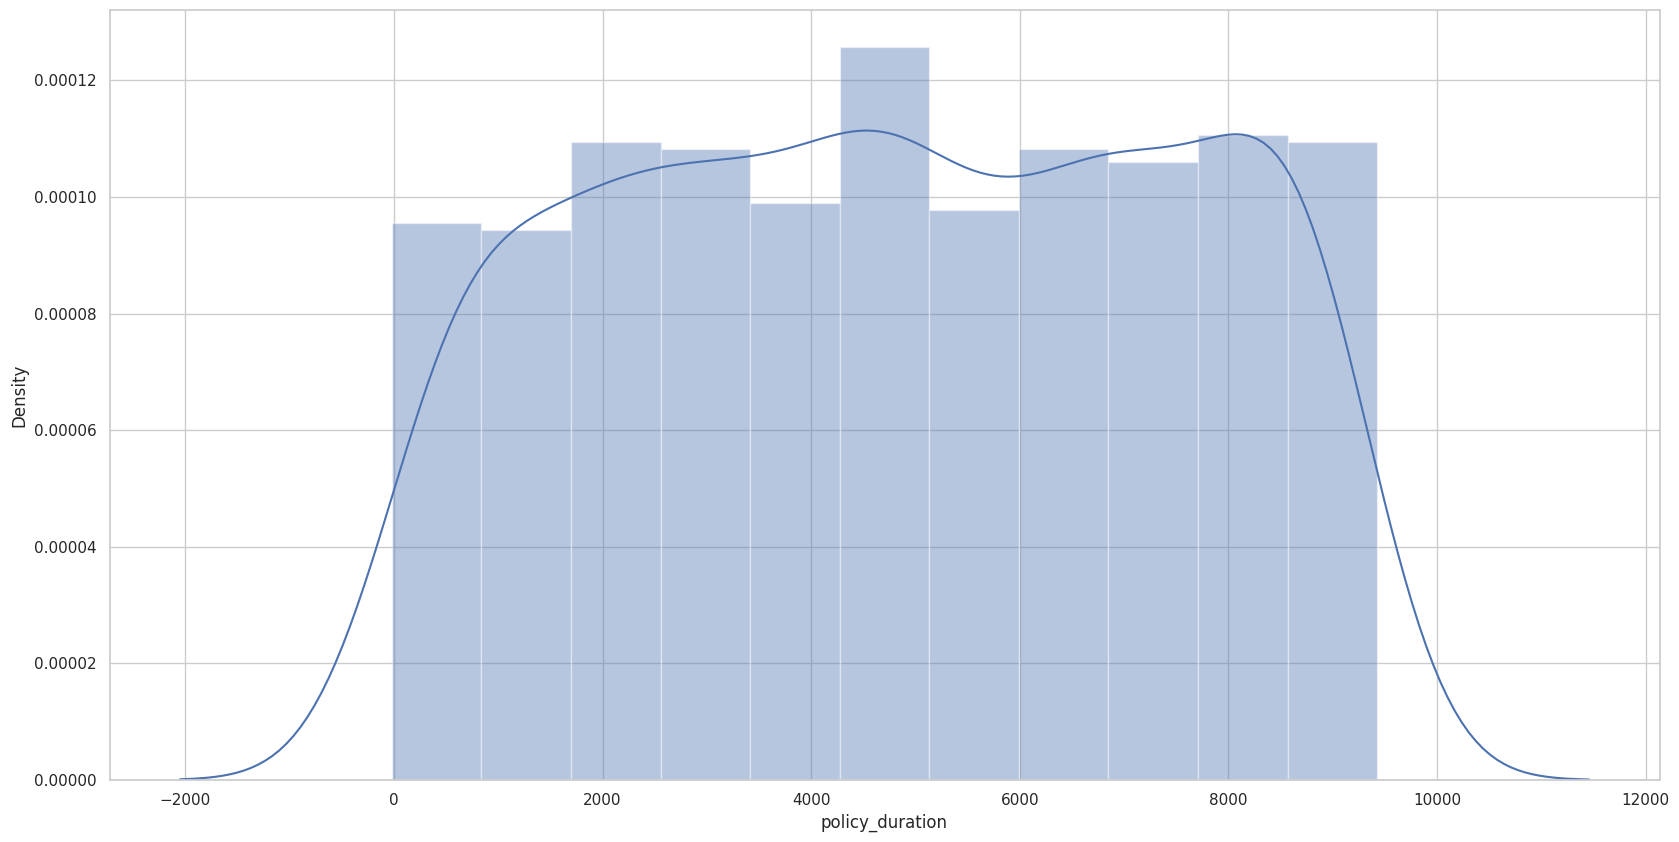

In [ ]:
df['policy_duration'] = df['policy_duration'].astype(str).str.split(' ').str[0].astype(int)
sns.distplot(df.policy_duration)

In [ ]:
df[['policy_duration']] = mm.fit_transform(df[['policy_duration']])

In [ ]:
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policystate_IL,policystate_IN,csl_250/500,csl_500/1000,sex_MALE,edu_Associate,edu_College,edu_High School,edu_JD,edu_Masters,edu_PhD,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_tech-support,occupation_transport-moving,hobby_base-jumping,hobby_basketball,hobby_bungie-jumping,hobby_camping,hobby_chess,hobby_cross-fit,hobby_dancing,hobby_exercise,hobby_golf,hobby_hiking,hobby_kayaking,hobby_movies,hobby_paintball,hobby_polo,hobby_reading,hobby_skydiving,hobby_sleeping,hobby_video-games,hobby_yachting,relation_husband,relation_not-in-family,relation_other-relative,relation_own-child,relation_wife,severity_Major Damage,severity_Minor Damage,severity_Total Loss,policy_duration,incidenttype_Multi-vehicle Collision,incidenttype_Parked Car,incidenttype_Single Vehicle Collision,auth_Ambulance,auth_Fire,auth_Other,auth_Police,inccity_Arlington,inccity_Hillsdale,inccity_Northbend,inccity_Northbrook,inccity_Riverwood,inccity_Springfield,incstate_NC,incstate_NY,incstate_PA,incstate_SC,incstate_VA,incstate_WV,brand_Accura MDX,brand_Accura RSX,brand_Accura TL,brand_Audi A3,brand_Audi A5,brand_BMW 3 Series,brand_BMW M5,brand_BMW X5,brand_BMW X6,brand_Chevrolet Malibu,brand_Chevrolet Silverado,brand_Chevrolet Tahoe,brand_Dodge Neon,brand_Dodge RAM,brand_Ford Escape,brand_Ford F150,brand_Ford Fusion,brand_Honda Accord,brand_Honda CRV,brand_Honda Civic,brand_Jeep Grand Cherokee,brand_Jeep Wrangler,brand_Mercedes C300,brand_Mercedes E400,brand_Mercedes ML350,brand_Nissan Maxima,brand_Nissan Pathfinder,brand_Nissan Ultima,brand_Saab 93,brand_Saab 95,brand_Suburu Forrestor,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat,coltype_Rear Collision,coltype_Front Collision,propdamage_YES,police_report_YES
0,0.684760,0.644444,0.333333,0.616705,0.0,0.188769,0.530348,1.000000,9935 4th Drive,0.217391,0.000000,0.5,0.666667,0.303497,0.973602,0.654296,0.45,Y,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.012704,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0
1,0.475992,0.511111,1.000000,-0.242521,5000000.0,0.199478,0.000000,1.000000,6608 MLK Hwy,0.347826,0.000000,0.0,0.000000,0.036364,-0.927019,0.043276,0.60,Y,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.333474,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,0.279749,0.222222,1.000000,0.642233,5000000.0,0.002766,0.349254,1.000000,7121 Francis Lane,0.304348,0.666667,1.0,1.000000,0.358974,-0.450311,0.289722,0.60,N,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.570718,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
3,0.534447,0.488889,1.000000,0.652886,6000000.0,0.932699,0.486567,0.438344,6956 Maple Drive,0.217391,0.000000,0.5,0.666667,0.295571,-0.063665,0.637187,0.95,Y,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.982426,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0
4,0.475992,0.555556,0.333333,1.341980,6000000.0,0.946264,0.656716,0.

In [ ]:
test = df.incident_location.str.split(' ').str[0]
test.value_counts()

7121    3
5812    3
9633    3
5455    2
2352    2
       ..
9154    1
5780    1
6945    1
5639    1
1416    1
Name: incident_location, Length: 939, dtype: int64

In [ ]:
df.drop(columns = ['incident_location'], axis = 1, inplace = True)

In [ ]:
fraud_dummy = pd.get_dummies(df.fraud_reported, prefix='fraud')
fraud_dummy.drop('fraud_N', axis = 1, inplace = True)
df.drop('fraud_reported', axis = 1, inplace = True)
df = pd.concat([df, fraud_dummy], axis = 1)
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,policystate_IL,policystate_IN,csl_250/500,csl_500/1000,sex_MALE,edu_Associate,edu_College,edu_High School,edu_JD,edu_Masters,edu_PhD,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_tech-support,occupation_transport-moving,hobby_base-jumping,hobby_basketball,hobby_bungie-jumping,hobby_camping,hobby_chess,hobby_cross-fit,hobby_dancing,hobby_exercise,hobby_golf,hobby_hiking,hobby_kayaking,hobby_movies,hobby_paintball,hobby_polo,hobby_reading,hobby_skydiving,hobby_sleeping,hobby_video-games,hobby_yachting,relation_husband,relation_not-in-family,relation_other-relative,relation_own-child,relation_wife,severity_Major Damage,severity_Minor Damage,severity_Total Loss,policy_duration,incidenttype_Multi-vehicle Collision,incidenttype_Parked Car,incidenttype_Single Vehicle Collision,auth_Ambulance,auth_Fire,auth_Other,auth_Police,inccity_Arlington,inccity_Hillsdale,inccity_Northbend,inccity_Northbrook,inccity_Riverwood,inccity_Springfield,incstate_NC,incstate_NY,incstate_PA,incstate_SC,incstate_VA,incstate_WV,brand_Accura MDX,brand_Accura RSX,brand_Accura TL,brand_Audi A3,brand_Audi A5,brand_BMW 3 Series,brand_BMW M5,brand_BMW X5,brand_BMW X6,brand_Chevrolet Malibu,brand_Chevrolet Silverado,brand_Chevrolet Tahoe,brand_Dodge Neon,brand_Dodge RAM,brand_Ford Escape,brand_Ford F150,brand_Ford Fusion,brand_Honda Accord,brand_Honda CRV,brand_Honda Civic,brand_Jeep Grand Cherokee,brand_Jeep Wrangler,brand_Mercedes C300,brand_Mercedes E400,brand_Mercedes ML350,brand_Nissan Maxima,brand_Nissan Pathfinder,brand_Nissan Ultima,brand_Saab 93,brand_Saab 95,brand_Suburu Forrestor,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat,coltype_Rear Collision,coltype_Front Collision,propdamage_YES,police_report_YES,fraud_Y
0,0.684760,0.644444,0.333333,0.616705,0.0,0.188769,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.303497,0.973602,0.654296,0.45,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.012704,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1
1,0.475992,0.511111,1.000000,-0.242521,5000000.0,0.199478,0.000000,1.000000,0.347826,0.000000,0.0,0.000000,0.036364,-0.927019,0.043276,0.60,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.333474,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1
2,0.279749,0.222222,1.000000,0.642233,5000000.0,0.002766,0.349254,1.000000,0.304348,0.666667,1.0,1.000000,0.358974,-0.450311,0.289722,0.60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.570718,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
3,0.534447,0.488889,1.000000,0.652886,6000000.0,0.932699,0.486567,0.438344,0.217391,0.000000,0.5,0.666667,0.295571,-0.063665,0.637187,0.95,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.982426,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0,1
4,0.475992,0.555556,0.333333,1.341980,6000000.0,0.946264,0.656716,0.585959,0.869565,0.000000,0.0,0.333333,0.060606,-0.947205,0.056359,0.70,1,0,0,1,1,1,0,0,0

In [ ]:
df.to_csv('data_for_fitting.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('data_for_fitting.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
df.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,policystate_IL,policystate_IN,csl_250/500,csl_500/1000,sex_MALE,edu_Associate,edu_College,edu_High School,edu_JD,edu_Masters,edu_PhD,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_tech-support,occupation_transport-moving,hobby_base-jumping,hobby_basketball,hobby_bungie-jumping,hobby_camping,hobby_chess,hobby_cross-fit,hobby_dancing,hobby_exercise,hobby_golf,hobby_hiking,hobby_kayaking,hobby_movies,hobby_paintball,hobby_polo,hobby_reading,hobby_skydiving,hobby_sleeping,hobby_video-games,hobby_yachting,relation_husband,relation_not-in-family,relation_other-relative,relation_own-child,relation_wife,severity_Major Damage,severity_Minor Damage,severity_Total Loss,policy_duration,incidenttype_Multi-vehicle Collision,incidenttype_Parked Car,incidenttype_Single Vehicle Collision,auth_Ambulance,auth_Fire,auth_Other,auth_Police,inccity_Arlington,inccity_Hillsdale,inccity_Northbend,inccity_Northbrook,inccity_Riverwood,inccity_Springfield,incstate_NC,incstate_NY,incstate_PA,incstate_SC,incstate_VA,incstate_WV,brand_Accura MDX,brand_Accura RSX,brand_Accura TL,brand_Audi A3,brand_Audi A5,brand_BMW 3 Series,brand_BMW M5,brand_BMW X5,brand_BMW X6,brand_Chevrolet Malibu,brand_Chevrolet Silverado,brand_Chevrolet Tahoe,brand_Dodge Neon,brand_Dodge RAM,brand_Ford Escape,brand_Ford F150,brand_Ford Fusion,brand_Honda Accord,brand_Honda CRV,brand_Honda Civic,brand_Jeep Grand Cherokee,brand_Jeep Wrangler,brand_Mercedes C300,brand_Mercedes E400,brand_Mercedes ML350,brand_Nissan Maxima,brand_Nissan Pathfinder,brand_Nissan Ultima,brand_Saab 93,brand_Saab 95,brand_Suburu Forrestor,brand_Suburu Impreza,brand_Suburu Legacy,brand_Toyota Camry,brand_Toyota Corolla,brand_Toyota Highlander,brand_Volkswagen Jetta,brand_Volkswagen Passat,coltype_Rear Collision,coltype_Front Collision,propdamage_YES,police_report_YES,fraud_Y
0,0.684760,0.644444,0.333333,0.616705,0.0,0.188769,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.303497,0.973602,0.654296,0.45,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.012704,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1
1,0.475992,0.511111,1.000000,-0.242521,5000000.0,0.199478,0.000000,1.000000,0.347826,0.000000,0.0,0.000000,0.036364,-0.927019,0.043276,0.60,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.333474,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1
2,0.279749,0.222222,1.000000,0.642233,5000000.0,0.002766,0.349254,1.000000,0.304348,0.666667,1.0,1.000000,0.358974,-0.450311,0.289722,0.60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.570718,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
3,0.534447,0.488889,1.000000,0.652886,6000000.0,0.932699,0.486567,0.438344,0.217391,0.000000,0.5,0.666667,0.295571,-0.063665,0.637187,0.95,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.982426,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0,1
4,0.475992,0.555556,0.333333,1.341980,6000000.0,0.946264,0.656716,0.585959,0.869565,0.000000,0.0,0.333333,0.060606,-0.947205,0.056359,0.70,1,0,0,1,1,1,0,0,0

# Train-Test Split & Persiapan Model

# New Section

In [ ]:
from sklearn.model_selection import train_test_split

df_target = df['fraud_Y']
df1 = df.drop(['fraud_Y'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df1, df_target, train_size=0.7)

In [ ]:
x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')

In [ ]:
#Load Data
x_train = pd.read_csv('x_train.csv').drop(columns = ['Unnamed: 0'])
y_train = pd.read_csv('y_train.csv').drop(columns = ['Unnamed: 0'])
x_test = pd.read_csv('x_test.csv').drop(columns = ['Unnamed: 0'])
y_test = pd.read_csv('y_test.csv').drop(columns = ['Unnamed: 0'])

# Import Packages

In [ ]:
!pip install imbalance-xgboost
!pip install bayesian-optimization
!pip install scikit-optimize
from bayes_opt import BayesianOptimization
import imxgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from skopt import BayesSearchCV
import imxgboost.imbalance_xgb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('default')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import inspect

print(inspect.signature(imxgboost.imbalance_xgb.xgb.XGBClassifier))
print(inspect.signature(imxgboost.imbalance_xgb.imbalance_xgboost))

(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
(num_round=10, max_depth=10, eta=0.3, verbosity=1, objective_func='binary:logitraw', eval_metric='logloss', booster='gbtree', special_objective=None, early_stopping_rounds=None, imbalance_alpha=None, focal_gamma=None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import inspect

print(inspect.signature(BayesSearchCV))

(estimator, search_spaces, optimizer_kwargs=None, n_iter=50, scoring=None, fit_params=None, n_jobs=1, n_points=1, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score='raise', return_train_score=False)


# XGBoost

In [ ]:
model1 = xgb.XGBClassifier( eval_metric='auc', subsample = 0.8, n_estimators = 500, tree_method = 'hist')
param_grid1 = {'max_depth': (5, 20),
            'min_child_weight': (4,10),
            'gamma': (0, 10),
            'colsample_bytree': (0.5,1),
            'eta':(0.05,0.2),
            'lambda': (0, 10),
                'alpha': (0, 10)}


BSCVxgb1 = BayesSearchCV(model1, search_spaces = param_grid1, n_iter = 50, cv = 5)

BSCVxgb1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/usr/local/lib/python3.10/dist-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check t

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='auc', feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=Non...
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=500, n_jobs=None,
                                      num_parallel_tree=None, predictor=None,
                                      random_state=None, ...),
              search_spaces={'alpha': (0, 10), 'colsample_bytree': (0.5, 1),
                             'eta': (0.05, 0.2), 'gamma': (0, 10),
                             'lambda': (0, 10), 'max_depth': (5, 20),
                             'min_child_weight': (4, 10)})

In [ ]:
modelxgb1 = BSCVxgb1.best_estimator_
modelxgb1.fit(x_train,y_train,verbose=True,
early_stopping_rounds=50,eval_set=[(x_train,y_train),(x_test,y_test)])
modelxgb1.set_params(n_estimators=modelxgb1.best_iteration)

[0]	validation_0-auc:0.89764	validation_1-auc:0.87119
[1]	validation_0-auc:0.90210	validation_1-auc:0.87439
[2]	validation_0-auc:0.89983	validation_1-auc:0.87695
[3]	validation_0-auc:0.89632	validation_1-auc:0.87732
[4]	validation_0-auc:0.89114	validation_1-auc:0.87901
[5]	validation_0-auc:0.88844	validation_1-auc:0.87846
[6]	validation_0-auc:0.88844	validation_1-auc:0.87846
[7]	validation_0-auc:0.88844	validation_1-auc:0.87846
[8]	validation_0-auc:0.88844	validation_1-auc:0.87846
[9]	validation_0-auc:0.88844	validation_1-auc:0.87846
[10]	validation_0-auc:0.88843	validation_1-auc:0.87846
[11]	validation_0-auc:0.88893	validation_1-auc:0.87726
[12]	validation_0-auc:0.89012	validation_1-auc:0.87759
[13]	validation_0-auc:0.89012	validation_1-auc:0.87759
[14]	validation_0-auc:0.88997	validation_1-auc:0.87759
[15]	validation_0-auc:0.89036	validation_1-auc:0.87644
[16]	validation_0-auc:0.89016	validation_1-auc:0.87602


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.89210	validation_1-auc:0.87508
[18]	validation_0-auc:0.89202	validation_1-auc:0.87508
[19]	validation_0-auc:0.89286	validation_1-auc:0.87520
[20]	validation_0-auc:0.89286	validation_1-auc:0.87520
[21]	validation_0-auc:0.89286	validation_1-auc:0.87520
[22]	validation_0-auc:0.89289	validation_1-auc:0.87520
[23]	validation_0-auc:0.89445	validation_1-auc:0.87508
[24]	validation_0-auc:0.89421	validation_1-auc:0.87454
[25]	validation_0-auc:0.89421	validation_1-auc:0.87454
[26]	validation_0-auc:0.89385	validation_1-auc:0.87394
[27]	validation_0-auc:0.89395	validation_1-auc:0.87394
[28]	validation_0-auc:0.89392	validation_1-auc:0.87394
[29]	validation_0-auc:0.89457	validation_1-auc:0.87382
[30]	validation_0-auc:0.89602	validation_1-auc:0.87351
[31]	validation_0-auc:0.89611	validation_1-auc:0.87321
[32]	validation_0-auc:0.89688	validation_1-auc:0.87357
[33]	validation_0-auc:0.89768	validation_1-auc:0.87412
[34]	validation_0-auc:0.89980	validation_1-auc:0.87357
[35]	valid

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric='auc',
              feature_types=None, gamma=7, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=0,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=4, missing=nan,
              monotone_constraints=None, n_estimators=4, n_jobs=None, ...)

In [ ]:
modelxgb1 = xgb.XGBClassifier()

modelxgb1.fit(x_train,y_train,verbose=True,
early_stopping_rounds=50,eval_set=[(x_train,y_train),(x_test,y_test)])
modelxgb1.set_params(n_estimators=modelxgb1.best_iteration)

[0]	validation_0-logloss:0.51258	validation_1-logloss:0.54897
[1]	validation_0-logloss:0.41096	validation_1-logloss:0.47201
[2]	validation_0-logloss:0.33775	validation_1-logloss:0.43064
[3]	validation_0-logloss:0.29344	validation_1-logloss:0.40446
[4]	validation_0-logloss:0.25916	validation_1-logloss:0.39081
[5]	validation_0-logloss:0.22672	validation_1-logloss:0.38051
[6]	validation_0-logloss:0.20868	validation_1-logloss:0.37611
[7]	validation_0-logloss:0.19060	validation_1-logloss:0.37185
[8]	validation_0-logloss:0.16817	validation_1-logloss:0.37756
[9]	validation_0-logloss:0.15604	validation_1-logloss:0.37658
[10]	validation_0-logloss:0.14149	validation_1-logloss:0.38365
[11]	validation_0-logloss:0.12767	validation_1-logloss:0.38611
[12]	validation_0-logloss:0.11968	validation_1-logloss:0.39430
[13]	validation_0-logloss:0.11061	validation_1-logloss:0.39721
[14]	validation_0-logloss:0.10140	validation_1-logloss:0.40028
[15]	validation_0-logloss:0.09514	validation_1-logloss:0.39977
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=7, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
modelxgb1.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
#predicting for training set
train_p1 = modelxgb1.predict(x_test)

#Looking at the classification report
print(classification_report(y_test, train_p1))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       227
           1       0.64      0.67      0.66        73

    accuracy                           0.83       300
   macro avg       0.77      0.78      0.77       300
weighted avg       0.83      0.83      0.83       300



In [ ]:
modelxgb1.save_model("xgboostpolos.json")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


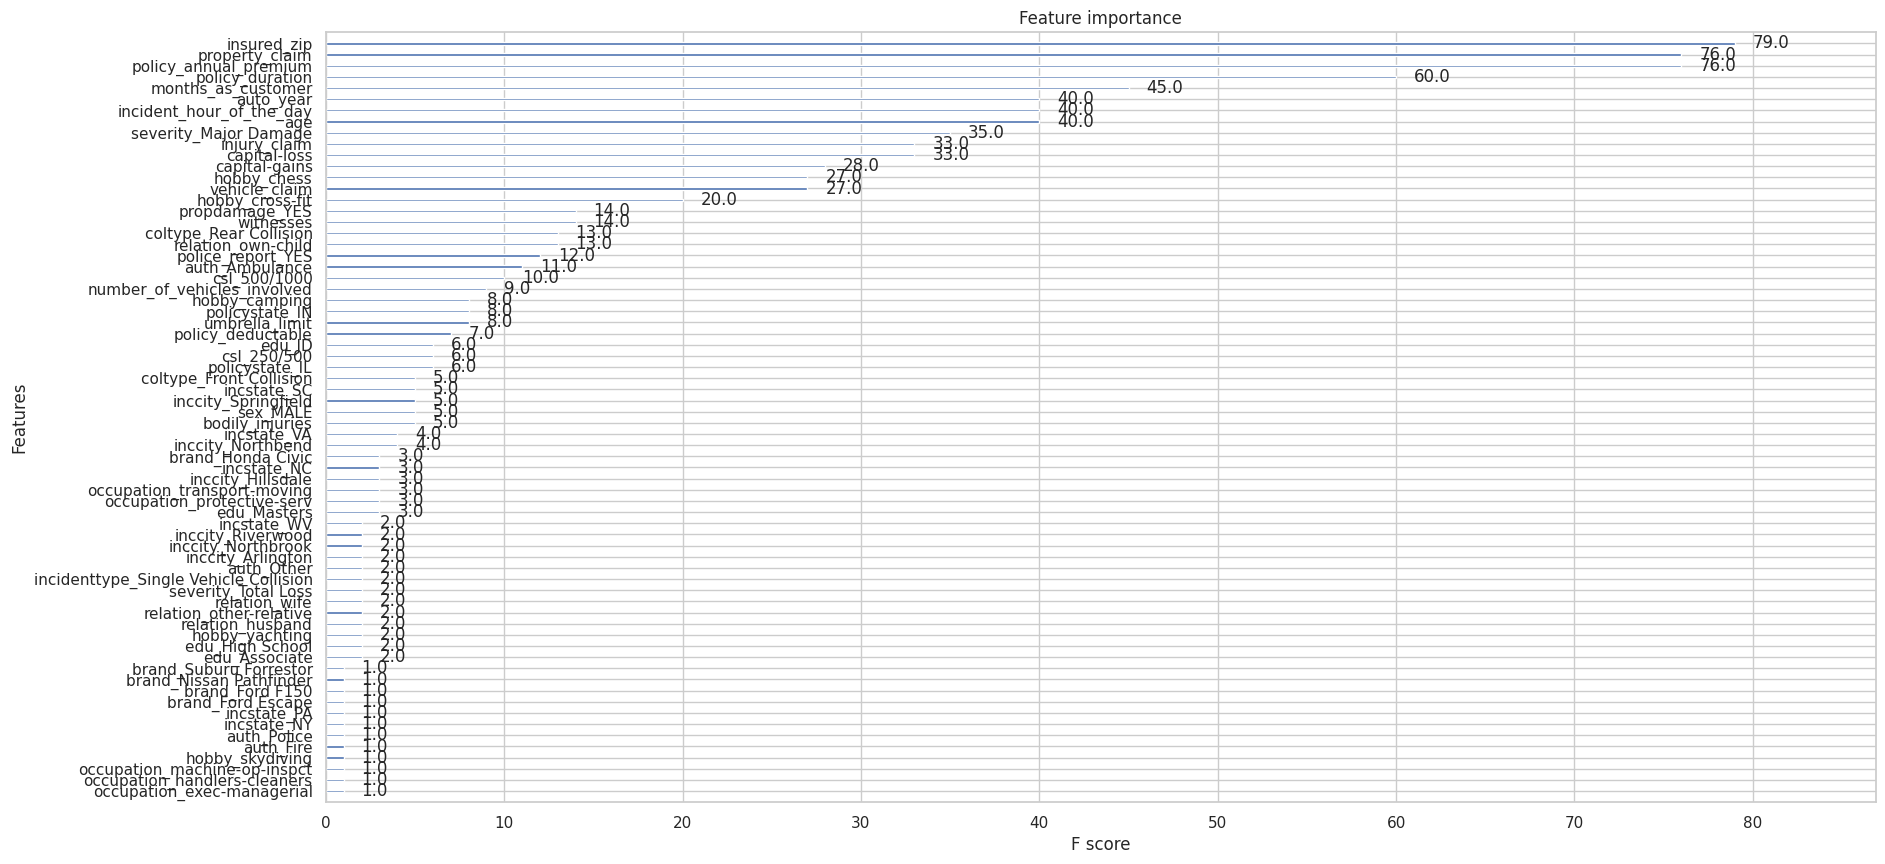

In [ ]:
from xgboost import plot_importance
plot_importance(modelxgb1)
plt.show()

In [ ]:
from pdpbox import pdp

# Define the two features for the PDP interaction plot
feature1 = 'policy_annual_premium'
feature2 = 'age'

# Calculate the PDP for feature 1
pdp_feature1 = pdp.pdp_isolate(model=modelxgb1, dataset=x_train, model_features=x_train.columns, feature=feature1)

# Calculate the PDP for feature 2
pdp_feature2 = pdp.pdp_isolate(model=modelxgb1, dataset=x_train, model_features=x_train.columns, feature=feature2)

# Plot the PDPs with ICE
fig, axes = pdp.pdp_plot(pdp_feature1, feature1, plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)
fig, axes = pdp.pdp_plot(pdp_feature2, feature2, plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

plt.show()


TypeError: ignored

In [ ]:
from pdpbox import pdp

# Define the two features for the PDP interaction plot
feature1 = 'policy_annual_premium'
feature2 = 'age'

# Calculate the PDP for feature 1
pdp_feature1 = pdp.PDPIsolate(model=modelxgb1,df=df1, model_features=x_train.columns, feature_name='age',feature='age')
# Calculate the PDP for feature 2
pdp_feature2 = pdp.pdp_isolate(model=modelxgb1, dataset=x_train, model_features=x_train.columns, feature=feature2)

# Plot the PDPs with ICE
fig, axes = pdp.pdp_plot(pdp_feature1, feature1, plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)
fig, axes = pdp.pdp_plot(pdp_feature2, feature2, plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

plt.show()


obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
from sklearn.inspection import plot_partial_dependence
# PD Plots
plot_partial_dependence(modelxgb1, X, ['age'])

ImportError: ignored

In [ ]:
# Retrieve the feature names from the input data
feature_names = x_train.columns.tolist()

# Assign the feature names to modelxgb1
modelxgb1.feature_names = feature_names

# Access the feature names in modelxgb1
# Access the feature count in modelxgb1
feature_count = len(modelxgb1.feature_names)

# Print the feature count
print(feature_count)



130


In [ ]:
plot_tree(modelxgb1)


In [ ]:
booster1=modelxgb1.get_booster()
tree_structure1=booster.get_dump()[0]
print(tree_structure1)

In [ ]:
! git clone https://github.com/SauceCat/PDPbox.git
! cd PDPbox
! python setup.py install

In [ ]:
!pip install ./PDPbox

# XGBoost dengan Oversampling

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
train_majority = x_train[y_train.fraud_Y==0]
y_train_majority = y_train[y_train.fraud_Y==0]
train_minority = x_train[y_train.fraud_Y==1]
y_train_minority = y_train[y_train.fraud_Y==1]

# Upsample minority class
x_train_minority_upsampled = resample(train_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=train_majority.shape[0])

y_train_minority_upsampled = resample(y_train_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=train_majority.shape[0])

# Combine majority class with upsampled minority class
x_train_upsampled = pd.concat([train_majority, x_train_minority_upsampled])
y_train_upsampled = pd.concat([y_train_majority, y_train_minority_upsampled])

# Display new class counts
y_train_upsampled.value_counts()

In [ ]:
from skopt import BayesSearchCV

model2 = xgb.XGBClassifier(eval_metric = 'auc', subsample = 0.8, n_estimators = 500, tree_method = 'hist')
param_grid2 = {'max_depth': (5, 20),
            'min_child_weight': (4,10),
            'gamma': (0, 10),
            'colsample_bytree': (0.5,1),
            'eta':(0.05,0.2),
            'lambda': (0, 10),
                'alpha': (0, 10)}

BSCVxgb2 = BayesSearchCV(model2, search_spaces = param_grid2, n_iter = 50, cv = 5)

BSCVxgb2.fit(x_train_upsampled, y_train_upsampled)

In [ ]:
modelxgb2 = BSCVxgb2.best_estimator_
modelxgb2.fit(x_train_upsampled,y_train_upsampled,verbose=True,
early_stopping_rounds=50,eval_set=[(x_train_upsampled,y_train_upsampled),(x_test,y_test)])
modelxgb2.set_params(n_estimators=modelxgb2.best_iteration)

In [ ]:
booster2=modelxgb2.get_booster()
tree_structure2=booster2.get_dump()[0]
print(tree_structure2)

In [ ]:
plot_tree(modelxgb2)

In [ ]:
#predicting for training set
train_p2 = modelxgb2.predict(x_test)

#Looking at the classification report
print(classification_report(y_test, train_p2))

In [ ]:
modelxgb2.save_model('xgboostoversampled.json')

In [ ]:
from xgboost import plot_importance
plot_importance(modelxgb2)
plt.show()

# XGBoost dengan Pembobotan Data

In [ ]:
from skopt import BayesSearchCV

model3 = xgb.XGBClassifier(eval_metric = 'auc', subsample = 0.8, n_estimators = 500,
                           tree_method = 'hist',
                           scale_pos_weight = (y_train.fraud_Y == 0).sum()/(y_train.fraud_Y == 1).sum())
param_grid3 = {'max_depth': (5, 20),
            'min_child_weight': (4,10),
            'gamma': (0, 10),
            'colsample_bytree': (0.5,1),
            'eta':(0.05,0.2),
            'lambda': (0, 10),
            'alpha': (0, 10)}

BSCVxgb3 = BayesSearchCV(model3, search_spaces = param_grid3, n_iter = 50, cv = 10)

BSCVxgb3.fit(x_train, y_train)

In [ ]:
modelxgb3 = BSCVxgb3.best_estimator_
modelxgb3.fit(x_train_upsampled,y_train_upsampled,verbose=True,
early_stopping_rounds=50,eval_set=[(x_train,y_train),(x_test,y_test)])
modelxgb3.set_params(n_estimators=modelxgb3.best_iteration)

In [ ]:
booster3=modelxgb3.get_booster()
tree_structure3=booster3.get_dump()[0]
print(tree_structure3)

In [ ]:
plot_tree(modelxgb3)

In [ ]:
#predicting for training set
train_p3 = modelxgb3.predict(x_test)

#Looking at the classification report
print(classification_report(y_test, train_p3))

In [ ]:
modelxgb3.save_model('xgboost_scaled.json')

# IM-XGBOOST Weighted

In [ ]:
from imxgboost.weighted_loss import Weight_Binary_Cross_Entropy
import numpy as np
from sklearn.metrics import roc_auc_score

params4 = modelxgb1.get_xgb_params()
del params4['objective']

#Searching For Best imbalance_alpha
auc_score_list = []
for i in np.arange(1.1, 5, 0.1):
    model4 = xgb.cv(params = params4, dtrain=xgb.DMatrix(x_train, label=y_train),
                      obj=Weight_Binary_Cross_Entropy(imbalance_alpha=i).weighted_binary_cross_entropy,
                   nfold = 10, num_boost_round = 50,metrics='auc', stratified = True)
    auc_score_list.append(model4['test-auc-mean'].mean())

max_auc4 = max(auc_score_list)
max_index4 = auc_score_list.index(max_auc4)
best_imb_alpha = 1.1 + max_index4*0.1

model4 = xgb.train(params = params4, dtrain=xgb.DMatrix(x_train, label=y_train),
                obj=Weight_Binary_Cross_Entropy(imbalance_alpha=best_imb_alpha).weighted_binary_cross_entropy)
raw4 = model4.predict(xgb.DMatrix(x_test, label=y_test))
sigmoid4 = 1. / (1. + np.exp(-raw4))
pred4 = np.round(sigmoid4)
print(classification_report(y_test,pred4))
print(best_imb_alpha)

In [ ]:
booster4=model4.get_booster()
tree_structure4=booster4.get_dump()[0]
print(tree_structure4)

In [ ]:
model4.save_model('imba_xgb_weighted')

# IMXGBOOST Focal

In [ ]:
from imxgboost.focal_loss import Focal_Binary_Loss
import numpy as np
from sklearn.metrics import roc_auc_score

params5 = modelxgb1.get_xgb_params()
del params5['objective']

#Searching For Best focal_gamma
auc_score_list = []
for i in np.arange(0.1, 5, 0.1):
    model5 = xgb.cv(params = params5, dtrain=xgb.DMatrix(x_train, label=y_train),
                      obj=Focal_Binary_Loss(gamma_indct=i).focal_binary_object,
                   nfold = 10, num_boost_round = 50,metrics='auc',stratified = True)
    auc_score_list.append(model5['test-auc-mean'].mean())

max_auc5 = max(auc_score_list)
max_index5 = auc_score_list.index(max_auc5)
best_focal_gamma = 0.1 + max_index5*0.1

model5 = xgb.train(params = params5, dtrain=xgb.DMatrix(x_train, label=y_train),
                obj=Focal_Binary_Loss(gamma_indct=best_focal_gamma).focal_binary_object)
raw5 = model5.predict(xgb.DMatrix(x_test, label=y_test))
sigmoid5 = 1. / (1. + np.exp(-raw5))
pred5 = np.round(sigmoid5)
print(classification_report(y_test,pred5))

In [ ]:
model5.save_model('imba_xgb_focal.json')

# Interpretable XGBOOST


In [ ]:
!pip install pyod
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt
from FBT import *

In [ ]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory:", cwd)


# Aproksimasi Untuk XGBOOST

In [ ]:
optimize_hyperparam=False
model1 = xgb.XGBClassifier( eval_metric='auc', subsample = 0.8, n_estimators = 500, tree_method = 'hist')
if optimize_hyperparam :
  param_grid1 = {'max_depth': (5, 20),
            'min_child_weight': (4,10),
            'gamma': (0, 10),
            'colsample_bytree': (0.5,1),
            'eta':(0.05,0.2),
            'lambda': (0, 10),
                'alpha': (0, 10)}


  BSCVxgb1 = BayesSearchCV(model1, search_spaces = param_grid1, n_iter = 50, cv = 5)

  BSCVxgb1.fit(x_train, y_train)

In [ ]:
if optimize_hyperparam :
    model1.set_params(**BSCVXGB1.best_params_)
model1.fit(x_train,y_train)

In [ ]:
from sklearn import tree
feature_cols=list(x_train.columns)
label_name = y_train.columns[0]
df_train= x_train.copy()
df_train[label_name]=y_train.values.squeeze()
fbt=FBT(max_depth=8,max_number_of_conjunctions=170,min_forest_size=10,pruning_method=None)
fbt.fit(df_train,feature_cols,label_name,model1,pruned_forest=10)


In [ ]:
print(len(fbt.tree.conjunctions))
for e in fbt.tree.conjunctions:
    print(e.toString())


In [ ]:
fbt.tree.print_tree(feature_cols)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
feature_colstest=list(x_test.columns)
label_nametest = y_test.columns[0]
df_test= x_test.copy()
df_test[label_nametest]=y_test.values.squeeze()
a = fbt.get_decision_paths(df_test[feature_cols])
print(a)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Load the data
data = pd.read_csv('/content/drive/MyDrive/source/insurance_claims.csv')

# Define the features and target variables
features = data.drop("fraud_reported", axis=1)
target = data["fraud_reported"]

# Perform one hot encoding on the categorical variables
features_encoded = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dtc.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = dtc.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

# Visualize the decision tree using Graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=list(features_encoded.columns), class_names=["No Fraud", "Fraud"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree1", view=True)


# Aproksimasi Untuk XGBOOST dengan oversampling


In [ ]:
from skopt import BayesSearchCV
optimize_hyperparam= False
model2 = xgb.XGBClassifier(eval_metric = 'auc', subsample = 0.8, n_estimators = 500, tree_method = 'hist')
if optimize_hyperparam :
  param_grid2 = {'max_depth': (5, 20),
            'min_child_weight': (4,10),
            'gamma': (0, 10),
            'colsample_bytree': (0.5,1),
            'eta':(0.05,0.2),
            'lambda': (0, 10),
                'alpha': (0, 10)}

BSCVxgb2 = BayesSearchCV(model2, search_spaces = param_grid2, n_iter = 50, cv = 5)

BSCVxgb2.fit(x_train_upsampled, y_train_upsampled)

In [ ]:
if optimize_hyperparam :
    model2.set_params(**BSCVXGB2.best_params_)
model2.fit(x_train_upsampled,y_train_upsampled)

In [ ]:
feature_cols_upsampled=list(x_train_upsampled.columns)
label_name_upsampled = y_train_upsampled.columns[0]
df_train_upsampled= x_train_upsampled.copy()
df_train_upsampled[label_name_upsampled]=y_train_upsampled.values.squeeze()
fbt=FBT(max_depth=8,max_number_of_conjunctions=170,min_forest_size=10,pruning_method=None)
fbt.fit(df_train_upsampled,feature_cols_upsampled,label_name_upsampled,model2)

In [ ]:
print(len(fbt.tree.conjunctions))
for e in fbt.tree.conjunctions:
    print(e.toString())

In [ ]:
fbt.tree.print_tree(feature_cols_upsampled)

In [ ]:
feature_upsampled=list(x_train_upsampled.columns)
label_upsampled = y_train_upsampled.columns[0]
df_upsampled= x_train_upsampled.copy()
df_upsampled[label_upsampled]=y_train_upsampled.values.squeeze()
b = fbt.get_decision_paths(df_upsampled[feature_upsampled])
print(b)

# Aproksimasi XGBOOST dengan PEMBOBOTAN DATA


In [ ]:
from skopt import BayesSearchCV
optimize_hyperparam=False


model3 = xgb.XGBClassifier(eval_metric = 'auc', subsample = 0.8, n_estimators = 500,
                           tree_method = 'hist',
                           scale_pos_weight = (y_train.fraud_Y == 0).sum()/(y_train.fraud_Y == 1).sum())
if optimize_hyperparam:
  param_grid3 = {'max_depth': (5, 20),
            'min_child_weight': (4,10),
            'gamma': (0, 10),
            'colsample_bytree': (0.5,1),
            'eta':(0.05,0.2),
            'lambda': (0, 10),
            'alpha': (0, 10)}

BSCVxgb3 = BayesSearchCV(model3, search_spaces = param_grid3, n_iter = 50, cv = 10)

BSCVxgb3.fit(x_train, y_train)

In [ ]:
if optimize_hyperparam :
    model3.set_params(**BSCVXGB2.best_params_)
model3.fit(x_train,y_train)

In [ ]:
feature_cols=list(x_train.columns)
label_name=y_train.columns[0]
df_train= x_train.copy()
df_train[label_name]=y_train.values.squeeze()
fbt=FBT(max_depth=8,max_number_of_conjunctions=170,min_forest_size=10,pruning_method=None)
fbt.fit(df_train,feature_cols,label_name,model3)

In [ ]:
print(len(fbt.tree.conjunctions))
for e in fbt.tree.conjunctions:
    print(e.toString())

In [ ]:
feature=list(x_train.columns)
label = y_train.columns[0]
df= x_train.copy()
df[label]=y_train.values.squeeze()
c = fbt.get_decision_paths(df[feature])
print(c)

# Aproksimasi IMXGBOOST WEIGHTED

In [ ]:
from imxgboost.weighted_loss import Weight_Binary_Cross_Entropy
import numpy as np
from sklearn.metrics import roc_auc_score
optimize_hyperparam=True
if optimize_hyperparam:

  params4 = modelxgb1.get_xgb_params()
  del params4['objective']


#Searching For Best imbalance_alpha
auc_score_list = []
for i in np.arange(1.1, 5, 0.1):
    model4 = xgb.cv(params = params4, dtrain=xgb.DMatrix(x_train, label=y_train),
                      obj=Weight_Binary_Cross_Entropy(imbalance_alpha=i).weighted_binary_cross_entropy,
                   nfold = 10, num_boost_round = 50,metrics='auc', stratified = True)
    auc_score_list.append(model4['test-auc-mean'].mean())

max_auc4 = max(auc_score_list)
max_index4 = auc_score_list.index(max_auc4)
best_imb_alpha = 1.1 + max_index4*0.1

model4 = xgb.train(params = params4, dtrain=xgb.DMatrix(x_train, label=y_train),
                obj=Weight_Binary_Cross_Entropy(imbalance_alpha=best_imb_alpha).weighted_binary_cross_entropy)
raw4 = model4.predict(xgb.DMatrix(x_test, label=y_test))
sigmoid4 = 1. / (1. + np.exp(-raw4))
pred4 = np.round(sigmoid4)
print(classification_report(y_test,pred4))


In [ ]:
raw4.set_params

In [ ]:
J=xgb.DMatrix(x_train, label=y_train)
feature_cols=xgb.DMatrix(x_train, label=y_train).feature_names
label_name=J.get_label()
df_train= x_train.copy()
df_train[label_name] = J.get_label()
fbt=FBT(max_depth=8,max_number_of_conjunctions=170,min_forest_size=10,pruning_method=None)
fbt.fit(df_train,feature_cols,label_name,model4)